Line from (7.0841582942, -8.8832535266) to (11.362107725, 0.0)
Line from (11.362107725, 0.0) to (7.0841582942, 8.8832535266)
Line from (7.0841582942, 8.8832535266) to (-2.5283068227, 11.0772359623)
Line from (-2.5283068227, 11.0772359623) to (-10.236905334, 4.929833784)
Line from (-10.236905334, 4.929833784) to (-10.236905334, -4.929833784)
Line from (-10.236905334, -4.929833784) to (-2.5283068227, -11.0772359623)
Line from (-2.5283068227, -11.0772359623) to (7.0841582942, -8.8832535266)


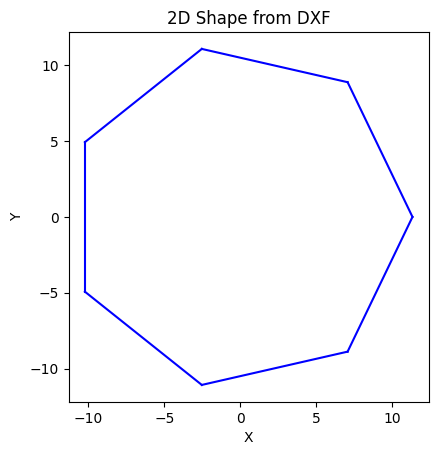

In [7]:
import ezdxf
import matplotlib.pyplot as plt
import numpy as np

# 读取DXF文件
dxf_file = 'seven.DXF'  # 直接使用文件名
doc = ezdxf.readfile(dxf_file)

# 创建一个图形窗口
fig, ax = plt.subplots()

# 获取模型空间中的所有线条
for entity in doc.modelspace():  # 直接迭代模型空间中的实体
    if entity.dxftype() == 'LINE':  # 如果是线段
        # 获取线段的起始和终止点
        start_point = entity.dxf.start
        end_point = entity.dxf.end
        print(f"Line from ({start_point.x}, {start_point.y}) to ({end_point.x}, {end_point.y})")

        # 将线段绘制到图形中
        ax.plot([start_point.x, end_point.x], [start_point.y, end_point.y], 'b-')

# 设置坐标轴比例和显示范围
ax.set_aspect('equal', 'box')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('2D Shape from DXF')

# 显示图形
plt.show()


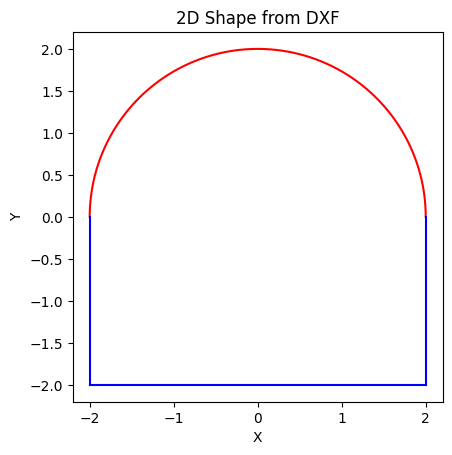

In [9]:
import ezdxf
import matplotlib.pyplot as plt
import numpy as np

# 读取DXF文件
dxf_file = 'cir_squre.DXF'  # 文件名
doc = ezdxf.readfile(dxf_file)

# 创建一个图形窗口
fig, ax = plt.subplots()

# 遍历模型空间中的所有实体
for entity in doc.modelspace():
    if entity.dxftype() == 'LINE':  # 处理线段
        start_point = entity.dxf.start
        end_point = entity.dxf.end
        # 绘制线段
        ax.plot([start_point.x, end_point.x], [start_point.y, end_point.y], 'b-', label="Line")
    
    elif entity.dxftype() == 'ARC':  # 处理圆弧
        center = entity.dxf.center
        radius = entity.dxf.radius
        start_angle = entity.dxf.start_angle
        end_angle = entity.dxf.end_angle
        # 生成圆弧的点
        theta = np.linspace(np.radians(start_angle), np.radians(end_angle), 100)
        x = center.x + radius * np.cos(theta)
        y = center.y + radius * np.sin(theta)
        # 绘制圆弧
        ax.plot(x, y, 'r-', label="Arc")

# 设置坐标轴比例和显示范围
ax.set_aspect('equal', 'box')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('2D Shape from DXF')

# 显示图形
plt.show()


下面这个代码是目前正在完善的，暂无bug

arc
(0.0, 0.0, 0.0)
2.000000000000016
0.0
3.141592781770264
6.283185563540578
line
(-2.0, -2.564e-07, 0.0)
(-2.0, -2.0000002564, 0.0)
2.0
line
(-2.0, -2.0000002564, 0.0)
(2.0, -2.0000002564, 0.0)
4.0
line
(2.0, 0.0, 0.0)
(2.0, -2.0000002564, 0.0)
2.0000002564

test_points
[-1.89707296  0.63333577]
[-1.92103629  0.5564347 ]
[-1.94188369  0.4786311 ]
[-1.95958135  0.40005115]
[-1.97410056  0.32082232]
[-1.98541778  0.24107312]
[-1.99351464  0.16093289]
[-1.99837801  0.08053163]
[-2.00000000e+00 -2.56360941e-07]
[-2.000e+00 -2.564e-07]
[-2.         -0.08333359]
[-2.         -0.16666692]
[-2.         -0.25000026]
[-2.         -0.33333359]
[-2.         -0.41666692]
[-2.         -0.50000026]
[-2.         -0.58333359]
[-2.         -0.66666692]
[-2.         -0.75000026]
[-2.         -0.83333359]
[-2.         -0.91666692]

result
type
圆弧
圆心
2.0
1.0
半径
2.0
type
圆弧
圆心
2.0
1.0
半径
2.0
type
圆弧
圆心
2.0
1.0
半径
2.0
type
圆弧
圆心
2.0
1.0
半径
2.0
type
圆弧
圆心
2.0
1.0
半径
2.0
type
圆弧
圆心
2.0
1.0
半径
2.0
type
圆弧
圆心


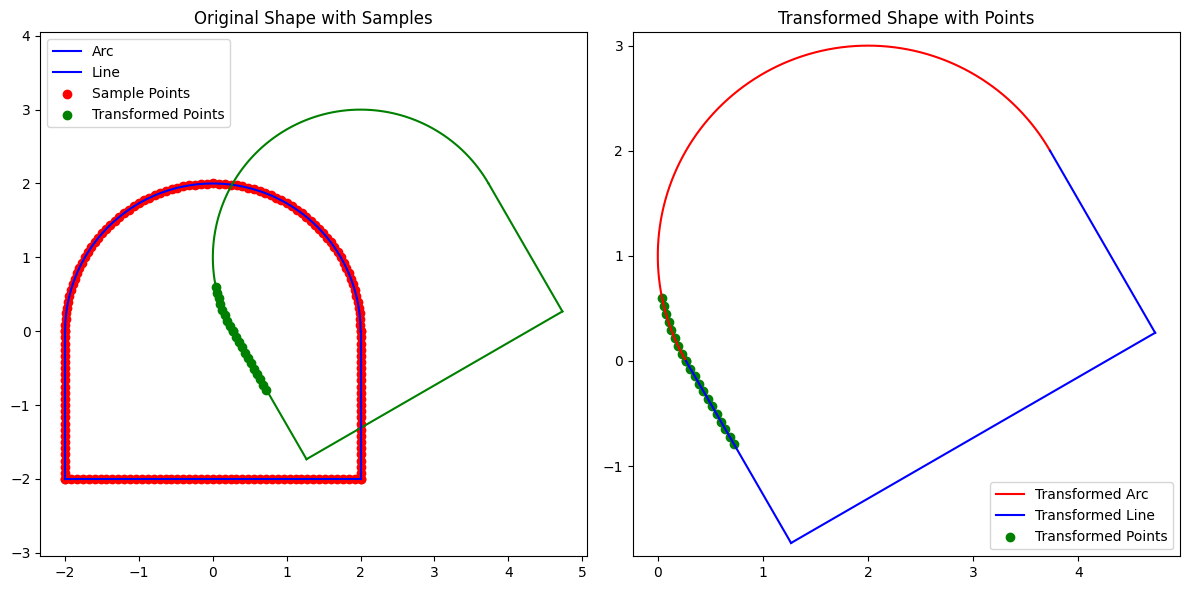

In [10]:
import ezdxf
import numpy as np
import matplotlib.pyplot as plt
def collect_edges(dxf_file):
    doc = ezdxf.readfile(dxf_file)
    edges = []
    for entity in doc.modelspace():
        if entity.dxftype() == 'LINE':
            start = entity.dxf.start
            end = entity.dxf.end
            length = np.linalg.norm([end.x - start.x, end.y - start.y])
            edges.append(('line', (start, end), length))
        elif entity.dxftype() == 'ARC':
            center = entity.dxf.center
            radius = entity.dxf.radius
            start_angle = np.radians(entity.dxf.start_angle)
            end_angle = np.radians(entity.dxf.end_angle)
            if end_angle < start_angle:
                end_angle += 2 * np.pi
            angle_diff = end_angle - start_angle
            length = radius * angle_diff
            edges.append(('arc', (center, radius, start_angle, end_angle), length))
    return edges

def sample_points(edges, n):
    total_length = sum(edge[2] for edge in edges)
    samples = []
    for _ in range(n):
        r = np.random.uniform(0, total_length)
        current = 0
        for edge in edges:
            if current + edge[2] >= r:
                if edge[0] == 'line':
                    start, end = edge[1]
                    t = (r - current) / edge[2]
                    x = start.x + t * (end.x - start.x)
                    y = start.y + t * (end.y - start.y)
                else:
                    center, radius, s_angle, e_angle = edge[1]
                    t = (r - current) / edge[2]
                    angle = s_angle + t * (e_angle - s_angle)
                    x = center.x + radius * np.cos(angle)
                    y = center.y + radius * np.sin(angle)
                samples.append([x, y])
                break
            current += edge[2]
    return np.array(samples)

def sample_points_uniform(edges, n):
    total_length = sum(edge[2] for edge in edges)
    if total_length == 0 or n == 0:
        return np.array([])
    
    # 计算每个边应分配的浮点数量
    float_points = [edge[2] / total_length * n for edge in edges]
    # 初始整数部分和余数
    points_per_edge = [int(fp) for fp in float_points]
    remainders = [fp - ip for fp, ip in zip(float_points, points_per_edge)]
    
    current_total = sum(points_per_edge)
    delta = n - current_total
    
    # 调整余数分配
    if delta != 0:
        sorted_indices = sorted(range(len(remainders)), key=lambda i: -remainders[i])
        for i in range(abs(delta)):
            idx = sorted_indices[i]
            if delta > 0:
                points_per_edge[idx] += 1
            else:
                points_per_edge[idx] -= 1
    
    samples = []
    for edge, k in zip(edges, points_per_edge):
        if k <= 0:
            continue
        if edge[0] == 'line':
            start, end = edge[1]
            t_values = np.linspace(0, 1, k)
            for t in t_values:
                x = start.x + t * (end.x - start.x)
                y = start.y + t * (end.y - start.y)
                samples.append([x, y])
        else:
            center, radius, s_angle, e_angle = edge[1]
            angle_values = np.linspace(s_angle, e_angle, k)
            for angle in angle_values:
                x = center.x + radius * np.cos(angle)
                y = center.y + radius * np.sin(angle)
                samples.append([x, y])
    
    return np.array(samples)



def create_transform_matrix(scale=1, theta=0, tx=0, ty=0):
    ct = np.cos(theta)
    st = np.sin(theta)
    return np.array([
        [scale*ct, -scale*st, tx],
        [scale*st, scale*ct, ty],
        [0,        0,        1]
    ])
    
def print_all_elements(array):
    for element in array:
        if isinstance(element, (list, tuple)):
            print_all_elements(element)
        elif isinstance(element, dict):
            # 打印字典内容，转换为列表形式以避免只打印键
            print_all_elements(list(element.items()))
        else:
            print(element)
            
def process_points(points):
    results = []
    for i in range(len(points) - 2):
        p1 = points[i]
        p2 = points[i+1]
        p3 = points[i+2]
        x1, y1 = p1
        x2, y2 = p2
        x3, y3 = p3
        
        # 判断是否共线
        area = (x2 - x1) * (y3 - y1) - (y2 - y1) * (x3 - x1)
        if abs(area) < 1e-9:
            # 处理直线
            start = (round(x1, 2), round(y1, 2))
            end = (round(x3, 2), round(y3, 2))
            A = round(y3 - y1, 2)
            B = round(x1 - x3, 2)
            C = round((x3 - x1)*y1 - (y3 - y1)*x1, 2)
            equation = f"{A:.2f}x + {B:.2f}y + {C:.2f} = 0"
            results.append({
                "type": "直线",
                "start": start,
                "end": end,
                "equation": equation
            })
        else:
            # 处理圆弧
            a1 = x2 - x1
            b1 = y2 - y1
            c1 = (x2**2 - x1**2 + y2**2 - y1**2) / 2
            a2 = x3 - x2
            b2 = y3 - y2
            c2 = (x3**2 - x2**2 + y3**2 - y2**2) / 2
            
            D = a1 * b2 - a2 * b1
            h = (b2 * c1 - b1 * c2) / D
            k = (a1 * c2 - a2 * c1) / D
            r = ((h - x1)**2 + (k - y1)**2)**0.5
            
            h = round(h, 2)
            k = round(k, 2)
            r = round(r, 2)
            results.append({
                "type": "圆弧",
                "圆心": (h, k),
                "半径": r
            })
    return results


# 读取DXF文件并获取变换参数
dxf_file = 'cir_squre.DXF'
edges = collect_edges(dxf_file)
print_all_elements(edges)
doc = ezdxf.readfile(dxf_file)  # 重新读取用于绘图
transform_matrix = create_transform_matrix(scale=1, theta=np.radians(30), tx=2, ty=1)

# 采样和应用变换
original_points = sample_points_uniform(edges, 180)
#print("\noriginal_points")
#print(f"\n{original_points[0][0]}, {original_points[0][1]}")
#print(f"\nPoint (2): ({original_points[1][0]}, {original_points[1][1]})")
#print_all_elements(original_points)

test_points = original_points[70:90+1]  # 包含a和b索引的行
print("\ntest_points")
print_all_elements(test_points)

homogeneous = np.column_stack([test_points, np.ones(len(test_points))])
#print("\nhomogeneous")
#print_all_elements(homogeneous)
transformed_points = (homogeneous @ transform_matrix.T)[:, :2]

result = process_points(transformed_points)
print("\nresult")
print_all_elements(result)


# 可视化设置
plt.figure(figsize=(12, 6))

# 左侧子图：原始图形和点
plt.subplot(121)
# 绘制原始图形
plotted_line, plotted_arc = False, False
for entity in doc.modelspace():
    if entity.dxftype() == 'LINE':
        start = entity.dxf.start
        end = entity.dxf.end
        plt.plot([start.x, end.x], [start.y, end.y], 
                'b-', label='Line' if not plotted_line else "")
        plotted_line = True
    elif entity.dxftype() == 'ARC':
        center = entity.dxf.center
        radius = entity.dxf.radius
        start_angle = entity.dxf.start_angle
        end_angle = entity.dxf.end_angle
        if end_angle < start_angle:
            end_angle += 360
        theta = np.linspace(start_angle, end_angle, 100)
        theta_rad = np.radians(theta)
        x = center.x + radius * np.cos(theta_rad)
        y = center.y + radius * np.sin(theta_rad)
        plt.plot(x, y, 'b-', label='Arc' if not plotted_arc else "")
        plotted_arc = True
    if entity.dxftype() == 'LINE':
        start = entity.dxf.start
        end = entity.dxf.end
        # 变换线段的端点
        start_t = transform_matrix @ np.array([start.x, start.y, 1])
        end_t = transform_matrix @ np.array([end.x, end.y, 1])
        plt.plot([start_t[0], end_t[0]], [start_t[1], end_t[1]], 
                'g-', label='Transformed Line' if not plotted_tline else "")
        plotted_tline = True
    elif entity.dxftype() == 'ARC':
        center = entity.dxf.center
        radius = entity.dxf.radius
        start_angle = entity.dxf.start_angle
        end_angle = entity.dxf.end_angle
        # 生成原始弧线点并变换
        if end_angle < start_angle:
            end_angle += 360
        theta = np.linspace(start_angle, end_angle, 100)
        theta_rad = np.radians(theta)
        x = center.x + radius * np.cos(theta_rad)
        y = center.y + radius * np.sin(theta_rad)
        # 应用变换到每个点
        points = np.column_stack([x, y, np.ones(len(x))])
        transformed = (points @ transform_matrix.T)[:, :2]
        plt.plot(transformed[:, 0], transformed[:, 1], 
                'g-', label='Transformed Arc' if not plotted_tarc else "")
        plotted_tarc = True
plt.scatter(original_points[:, 0], original_points[:, 1], c='r', label='Sample Points')
plt.scatter(transformed_points[:, 0], transformed_points[:, 1], c='g', label='Transformed Points')
plt.title("Original Shape with Samples")
plt.axis('equal')
plt.legend()

# 右侧子图：变换后的图形和点
plt.subplot(122)
# 绘制变换后的图形
plotted_tline, plotted_tarc = False, False
for entity in doc.modelspace():
    if entity.dxftype() == 'LINE':
        start = entity.dxf.start
        end = entity.dxf.end
        # 变换线段的端点
        start_t = transform_matrix @ np.array([start.x, start.y, 1])
        end_t = transform_matrix @ np.array([end.x, end.y, 1])
        plt.plot([start_t[0], end_t[0]], [start_t[1], end_t[1]], 
                'b-', label='Transformed Line' if not plotted_tline else "")
        plotted_tline = True
        
    elif entity.dxftype() == 'ARC':
        center = entity.dxf.center
        radius = entity.dxf.radius
        start_angle = entity.dxf.start_angle
        end_angle = entity.dxf.end_angle
        # 生成原始弧线点并变换
        if end_angle < start_angle:
            end_angle += 360
        theta = np.linspace(start_angle, end_angle, 100)
        theta_rad = np.radians(theta)
        x = center.x + radius * np.cos(theta_rad)
        y = center.y + radius * np.sin(theta_rad)
        # 应用变换到每个点
        points = np.column_stack([x, y, np.ones(len(x))])
        transformed = (points @ transform_matrix.T)[:, :2]
        plt.plot(transformed[:, 0], transformed[:, 1], 
                'r-', label='Transformed Arc' if not plotted_tarc else "")
        plotted_tarc = True

plt.scatter(transformed_points[:, 0], transformed_points[:, 1], c='g', label='Transformed Points')
plt.title("Transformed Shape with Points")
plt.axis('equal')
plt.legend()

plt.tight_layout()
plt.show()

最优参数：缩放=0.8229, 旋转=18.72°, 平移=(-1.25, -0.95)
对齐误差：0.0192


C:\Users\NUC\AppData\Local\Temp\ipykernel_22356\2807541709.py:256: UserWarning: Glyph 21407 (\N{CJK UNIFIED IDEOGRAPH-539F}) missing from current font.
  plt.tight_layout()
C:\Users\NUC\AppData\Local\Temp\ipykernel_22356\2807541709.py:256: UserWarning: Glyph 22987 (\N{CJK UNIFIED IDEOGRAPH-59CB}) missing from current font.
  plt.tight_layout()
C:\Users\NUC\AppData\Local\Temp\ipykernel_22356\2807541709.py:256: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from current font.
  plt.tight_layout()
C:\Users\NUC\AppData\Local\Temp\ipykernel_22356\2807541709.py:256: UserWarning: Glyph 24418 (\N{CJK UNIFIED IDEOGRAPH-5F62}) missing from current font.
  plt.tight_layout()
C:\Users\NUC\AppData\Local\Temp\ipykernel_22356\2807541709.py:256: UserWarning: Glyph 21021 (\N{CJK UNIFIED IDEOGRAPH-521D}) missing from current font.
  plt.tight_layout()
C:\Users\NUC\AppData\Local\Temp\ipykernel_22356\2807541709.py:256: UserWarning: Glyph 21464 (\N{CJK UNIFIED IDEOGRAPH-53D8}) missing fr

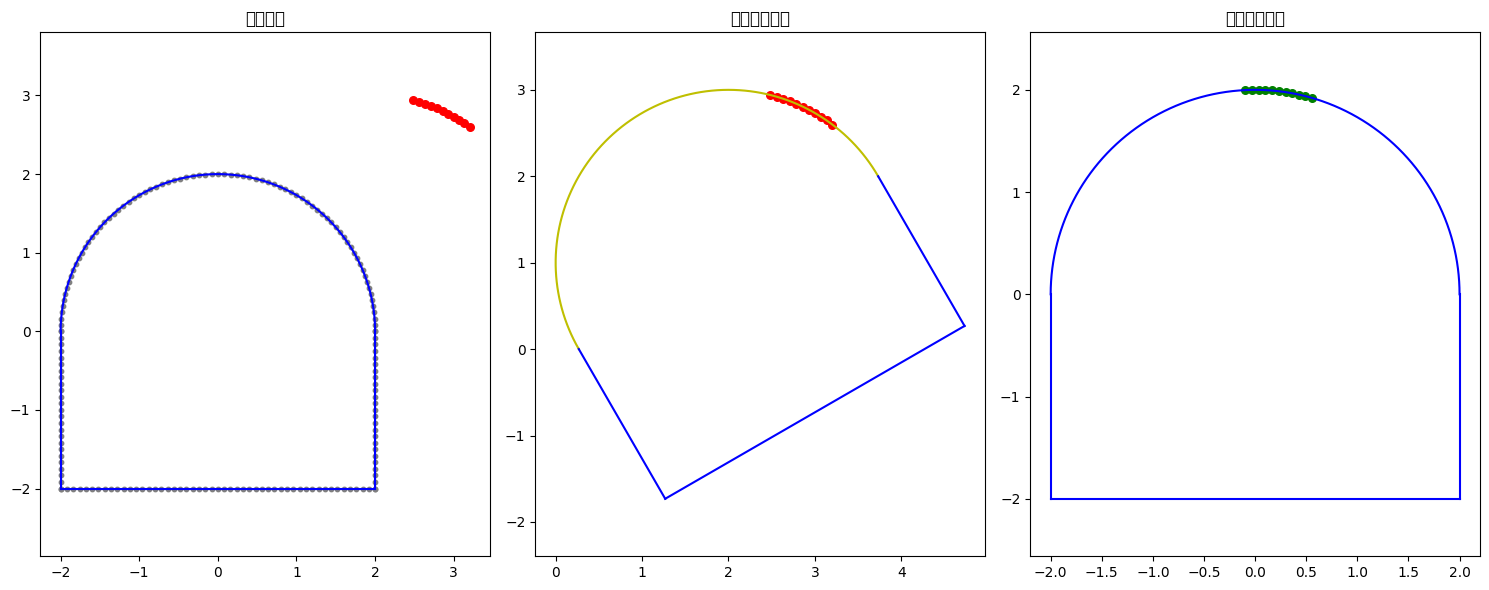

In [37]:
import ezdxf
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# -------------------- 基础功能函数 --------------------
def collect_edges(dxf_file):
    doc = ezdxf.readfile(dxf_file)
    edges = []
    for entity in doc.modelspace():
        if entity.dxftype() == 'LINE':
            start = entity.dxf.start
            end = entity.dxf.end
            length = np.linalg.norm([end.x - start.x, end.y - start.y])
            edges.append(('line', (start, end), length))
        elif entity.dxftype() == 'ARC':
            center = entity.dxf.center
            radius = entity.dxf.radius
            start_angle = np.radians(entity.dxf.start_angle)
            end_angle = np.radians(entity.dxf.end_angle)
            if end_angle < start_angle:
                end_angle += 2 * np.pi
            angle_diff = end_angle - start_angle
            length = radius * angle_diff
            edges.append(('arc', (center, radius, start_angle, end_angle), length))
    return edges

def sample_points_uniform(edges, n):
    total_length = sum(edge[2] for edge in edges)
    if total_length == 0 or n == 0:
        return np.array([])
    
    float_points = [edge[2] / total_length * n for edge in edges]
    points_per_edge = [int(fp) for fp in float_points]
    remainders = [fp - ip for fp, ip in zip(float_points, points_per_edge)]
    
    current_total = sum(points_per_edge)
    delta = n - current_total
    
    if delta != 0:
        sorted_indices = sorted(range(len(remainders)), key=lambda i: -remainders[i])
        for i in range(abs(delta)):
            idx = sorted_indices[i]
            if delta > 0:
                points_per_edge[idx] += 1
            else:
                points_per_edge[idx] -= 1
    
    samples = []
    for edge, k in zip(edges, points_per_edge):
        if k <= 0:
            continue
        if edge[0] == 'line':
            start, end = edge[1]
            t_values = np.linspace(0, 1, k)
            for t in t_values:
                x = start.x + t * (end.x - start.x)
                y = start.y + t * (end.y - start.y)
                samples.append([x, y])
        else:
            center, radius, s_angle, e_angle = edge[1]
            angle_values = np.linspace(s_angle, e_angle, k)
            for angle in angle_values:
                x = center.x + radius * np.cos(angle)
                y = center.y + radius * np.sin(angle)
                samples.append([x, y])
    
    return np.array(samples)

def create_transform_matrix(scale=1, theta=0, tx=0, ty=0):
    ct = np.cos(theta)
    st = np.sin(theta)
    return np.array([
        [scale*ct, -scale*st, tx],
        [scale*st, scale*ct, ty],
        [0,        0,        1]
    ])

# -------------------- 点对齐功能 --------------------
def distance_to_edge(point, edges):
    min_dist = np.inf
    closest_point = None
    x, y = point
    for edge in edges:
        if edge[0] == 'line':
            (start, end), length = edge[1], edge[2]
            x1, y1 = start.x, start.y
            x2, y2 = end.x, end.y
            dx, dy = x2 - x1, y2 - y1
            if dx == 0 and dy == 0:
                dist = np.hypot(x - x1, y - y1)
                cp = (x1, y1)
            else:
                t = ((x - x1)*dx + (y - y1)*dy) / (dx**2 + dy**2)
                t = np.clip(t, 0, 1)
                proj_x = x1 + t*dx
                proj_y = y1 + t*dy
                dist = np.hypot(x - proj_x, y - proj_y)
                cp = (proj_x, proj_y)
        elif edge[0] == 'arc':
            (center, radius, s_angle, e_angle), length = edge[1], edge[2]
            cx, cy = center.x, center.y
            angle = np.arctan2(y - cy, x - cx)
            angle_diff = e_angle - s_angle
            if angle_diff < 0:
                angle_diff += 2*np.pi
            angle_rel = (angle - s_angle) % (2*np.pi)
            if angle_rel > angle_diff:
                d1 = np.hypot(x - (cx + radius*np.cos(s_angle)), y - (cy + radius*np.sin(s_angle)))
                d2 = np.hypot(x - (cx + radius*np.cos(e_angle)), y - (cy + radius*np.sin(e_angle)))
                if d1 < d2:
                    dist, cp = d1, (cx + radius*np.cos(s_angle), cy + radius*np.sin(s_angle))
                else:
                    dist, cp = d2, (cx + radius*np.cos(e_angle), cy + radius*np.sin(e_angle))
            else:
                proj_x = cx + radius * np.cos(angle)
                proj_y = cy + radius * np.sin(angle)
                dist = np.hypot(x - proj_x, y - proj_y)
                cp = (proj_x, proj_y)
        if dist < min_dist:
            min_dist = dist
            closest_point = cp
    return min_dist, closest_point

def objective_function(params, points_to_align, edges):
    scale, theta, tx, ty = params
    transform = create_transform_matrix(scale, theta, tx, ty)
    homogeneous = np.column_stack([points_to_align, np.ones(len(points_to_align))])
    points_transformed = (homogeneous @ transform.T)[:, :2]
    total_error = 0
    for pt in points_transformed:
        dist, _ = distance_to_edge(pt, edges)
        total_error += dist
    return total_error

def find_optimal_transform(points_to_align, edges):
    initial_guess = [1.0, 0.0, 0.0, 0.0]
    bounds = [
        (0.5, 2.0),    # scale
        (-np.pi, np.pi), # theta
        (-10, 10),     # tx
        (-10, 10)      # ty
    ]
    result = minimize(
        objective_function,
        initial_guess,
        args=(points_to_align, edges),
        method='L-BFGS-B',
        bounds=bounds,
        options={'maxiter': 100}
    )
    return result.x, result.fun

def align_points(points_to_align, edges):
    params, error = find_optimal_transform(points_to_align, edges)
    scale, theta, tx, ty = params
    transform = create_transform_matrix(scale, theta, tx, ty)
    homogeneous = np.column_stack([points_to_align, np.ones(len(points_to_align))])
    aligned_points = (homogeneous @ transform.T)[:, :2]
    
    # 验证解的唯一性
    alt_params, alt_error = find_optimal_transform(aligned_points, edges)
    if np.abs(alt_error - error) > 1e-3:
        print("警告：检测到多个可能解，请添加更多参考点！")
    
    print(f"最优参数：缩放={scale:.4f}, 旋转={np.degrees(theta):.2f}°, 平移=({tx:.2f}, {ty:.2f})")
    print(f"对齐误差：{error:.4f}")
    return aligned_points

# -------------------- 主程序 --------------------
if __name__ == "__main__":
    # 读取DXF文件
    dxf_file = 'cir_squre.DXF'
    edges = collect_edges(dxf_file)
    doc = ezdxf.readfile(dxf_file)
    
    # 生成采样点
    original_points = sample_points_uniform(edges, 180)
    test_points = original_points[10:21]  # 选取第10-20个点
    
    # 应用初始变换
    transform_matrix = create_transform_matrix(scale=1, theta=np.radians(30), tx=2, ty=1)
    homogeneous = np.column_stack([test_points, np.ones(len(test_points))])
    transformed_points = (homogeneous @ transform_matrix.T)[:, :2]
    
    # 执行点对齐
    aligned_points = align_points(transformed_points, edges)
    
    # 可视化
    plt.figure(figsize=(15, 6))
    
    # 原始图形
    plt.subplot(131)
    for entity in doc.modelspace():
        if entity.dxftype() == 'LINE':
            start, end = entity.dxf.start, entity.dxf.end
            plt.plot([start.x, end.x], [start.y, end.y], 'b-')
        elif entity.dxftype() == 'ARC':
            center = entity.dxf.center
            radius = entity.dxf.radius
            angles = np.linspace(entity.dxf.start_angle, entity.dxf.end_angle, 100)
            x = center.x + radius * np.cos(np.radians(angles))
            y = center.y + radius * np.sin(np.radians(angles))
            plt.plot(x, y, 'b-')
    plt.scatter(original_points[:,0], original_points[:,1], c='gray', s=10, label='原始采样点')
    plt.scatter(transformed_points[:,0], transformed_points[:,1], c='r', s=30, label='变换后点')
    plt.title("原始图形")
    plt.axis('equal')
    
    # 变换后点云
    plt.subplot(132)
    for entity in doc.modelspace():
        if entity.dxftype() == 'LINE':
            start = transform_matrix @ np.array([entity.dxf.start.x, entity.dxf.start.y, 1])
            end = transform_matrix @ np.array([entity.dxf.end.x, entity.dxf.end.y, 1])
            plt.plot([start[0], end[0]], [start[1], end[1]], 'b-')
        elif entity.dxftype() == 'ARC':
            center = entity.dxf.center
            radius = entity.dxf.radius
            start_angle = entity.dxf.start_angle
            end_angle = entity.dxf.end_angle
            # 生成原始弧线点并变换
            if end_angle < start_angle:
                end_angle += 360
            theta = np.linspace(start_angle, end_angle, 100)
            theta_rad = np.radians(theta)
            x = center.x + radius * np.cos(theta_rad)
            y = center.y + radius * np.sin(theta_rad)
            # 应用变换到每个点
            points = np.column_stack([x, y, np.ones(len(x))])
            transformed = (points @ transform_matrix.T)[:, :2]
            plt.plot(transformed[:, 0], transformed[:, 1], 
                    'y-', label='Transformed Arc' if not plotted_tarc else "")
            plotted_tarc = True
        
    plt.scatter(transformed_points[:,0], transformed_points[:,1], c='r', s=30, label='变换后点')
    plt.title("初始变换结果")
    plt.axis('equal')
    
    # 对齐后点云
    plt.subplot(133)
    for entity in doc.modelspace():
        if entity.dxftype() == 'LINE':
            plt.plot([entity.dxf.start.x, entity.dxf.end.x], 
                    [entity.dxf.start.y, entity.dxf.end.y], 'b-')
        elif entity.dxftype() == 'ARC':
            center = entity.dxf.center
            angles = np.linspace(entity.dxf.start_angle, entity.dxf.end_angle, 100)
            x = center.x + entity.dxf.radius * np.cos(np.radians(angles))
            y = center.y + entity.dxf.radius * np.sin(np.radians(angles))
            plt.plot(x, y, 'b-')
    plt.scatter(aligned_points[:,0], aligned_points[:,1], c='g', s=30, label='对齐后点')
    plt.title("优化对齐结果")
    plt.axis('equal')
    
    plt.tight_layout()
    plt.show()

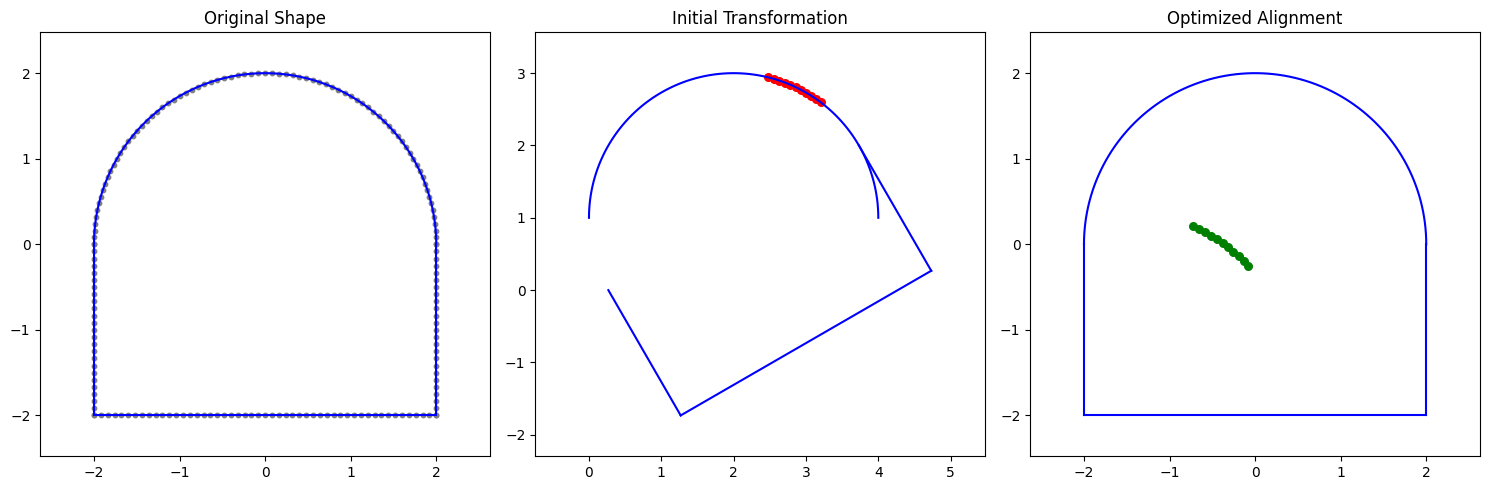

Optimal parameters:
Rotation: 19.26°
Translation: (-1.56, -1.60)
Alignment error: 0.0000


In [38]:
import ezdxf
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# -------------------- Core Functions --------------------
def collect_edges(dxf_file):
    doc = ezdxf.readfile(dxf_file)
    edges = []
    for entity in doc.modelspace():
        if entity.dxftype() == 'LINE':
            start = entity.dxf.start
            end = entity.dxf.end
            length = np.linalg.norm([end.x - start.x, end.y - start.y])
            edges.append(('line', (start, end), length))
        elif entity.dxftype() == 'ARC':
            center = entity.dxf.center
            radius = entity.dxf.radius
            start_angle = np.radians(entity.dxf.start_angle)
            end_angle = np.radians(entity.dxf.end_angle)
            if end_angle < start_angle:
                end_angle += 2 * np.pi
            angle_diff = end_angle - start_angle
            length = radius * angle_diff
            edges.append(('arc', (center, radius, start_angle, end_angle), length))
    return edges

def sample_points_uniform(edges, n):
    total_length = sum(edge[2] for edge in edges)
    if total_length == 0 or n == 0:
        return np.array([])
    
    float_points = [edge[2]/total_length*n for edge in edges]
    points_per_edge = [int(fp) for fp in float_points]
    remainders = [fp-ip for fp, ip in zip(float_points, points_per_edge)]
    
    current_total = sum(points_per_edge)
    delta = n - current_total
    
    if delta != 0:
        sorted_indices = sorted(range(len(remainders)), key=lambda i: -remainders[i])
        for i in range(abs(delta)):
            idx = sorted_indices[i]
            points_per_edge[idx] += 1 if delta > 0 else -1
    
    samples = []
    for edge, k in zip(edges, points_per_edge):
        if k <= 0: continue
        if edge[0] == 'line':
            start, end = edge[1]
            for t in np.linspace(0, 1, k):
                x = start.x + t*(end.x - start.x)
                y = start.y + t*(end.y - start.y)
                samples.append([x, y])
        else:
            center, radius, s_angle, e_angle = edge[1]
            for angle in np.linspace(s_angle, e_angle, k):
                x = center.x + radius*np.cos(angle)
                y = center.y + radius*np.sin(angle)
                samples.append([x, y])
    
    return np.array(samples)

def create_transform_matrix(theta=0, tx=0, ty=0):
    ct, st = np.cos(theta), np.sin(theta)
    return np.array([
        [ct, -st, tx],
        [st,  ct, ty],
        [0,   0,  1]
    ])

# -------------------- Alignment Functions --------------------
def distance_to_edge(point, edges):
    x, y = point
    min_dist = np.inf
    for edge in edges:
        if edge[0] == 'line':
            (start, end), _ = edge[1], edge[2]
            x1, y1, x2, y2 = start.x, start.y, end.x, end.y
            dx, dy = x2-x1, y2-y1
            if dx == dy == 0:
                dist = np.hypot(x-x1, y-y1)
            else:
                t = ((x-x1)*dx + (y-y1)*dy)/(dx**2 + dy**2)
                t = np.clip(t, 0, 1)
                px, py = x1 + t*dx, y1 + t*dy
                dist = np.hypot(x-px, y-py)
        elif edge[0] == 'arc':
            (center, radius, s_angle, e_angle), _ = edge[1], edge[2]
            cx, cy = center.x, center.y
            angle = np.arctan2(y-cy, x-cx)
            angle_diff = (e_angle - s_angle) % (2*np.pi)
            angle_rel = (angle - s_angle) % (2*np.pi)
            
            if angle_rel > angle_diff:
                d1 = np.hypot(x - (cx+radius*np.cos(s_angle)), y - (cy+radius*np.sin(s_angle)))
                d2 = np.hypot(x - (cx+radius*np.cos(e_angle)), y - (cy+radius*np.sin(e_angle)))
                dist = min(d1, d2)
            else:
                px = cx + radius*np.cos(angle)
                py = cy + radius*np.sin(angle)
                dist = np.hypot(x-px, y-py)
                
        if dist < min_dist:
            min_dist = dist
    return min_dist

def objective_function(params, points, edges):
    theta, tx, ty = params
    transform = create_transform_matrix(theta, tx, ty)
    homogeneous = np.column_stack([points, np.ones(len(points))])
    transformed = (homogeneous @ transform.T)[:, :2]
    return sum(distance_to_edge(p, edges) for p in transformed)

def optimize_alignment(points, edges):
    result = minimize(
        objective_function,
        x0=[0, 0, 0],  # Initial guess: no rotation/translation
        args=(points, edges),
        bounds=[
            (-np.pi, np.pi),  # Theta
            (-10, 10),        # tx
            (-10, 10)         # ty
        ],
        method='L-BFGS-B',
        options={'maxiter': 200}
    )
    return result.x, result.fun

# -------------------- Main Program --------------------
if __name__ == "__main__":
    # Load DXF
    dxf_file = 'cir_squre.DXF'
    edges = collect_edges(dxf_file)
    doc = ezdxf.readfile(dxf_file)
    
    # Generate points
    original_points = sample_points_uniform(edges, 180)
    test_points = original_points[10:21]  # Points 10-20
    
    # Apply initial transformation (30 degree rotation, translation (2,1))
    initial_transform = create_transform_matrix(np.radians(30), 2, 1)
    homogeneous = np.column_stack([test_points, np.ones(len(test_points))])
    transformed_points = (homogeneous @ initial_transform.T)[:, :2]
    
    # Optimize alignment
    opt_params, min_error = optimize_alignment(transformed_points, edges)
    theta_opt, tx_opt, ty_opt = opt_params
    final_transform = create_transform_matrix(theta_opt, tx_opt, ty_opt)
    aligned_points = (homogeneous @ final_transform.T)[:, :2]
    
    # Visualization
    plt.figure(figsize=(15, 5))
    
    # Original Shape
    plt.subplot(131)
    for entity in doc.modelspace():
        if entity.dxftype() == 'LINE':
            start, end = entity.dxf.start, entity.dxf.end
            plt.plot([start.x, end.x], [start.y, end.y], 'b-')
        elif entity.dxftype() == 'ARC':
            center = entity.dxf.center
            angles = np.linspace(entity.dxf.start_angle, entity.dxf.end_angle, 100)
            x = center.x + entity.dxf.radius * np.cos(np.radians(angles))
            y = center.y + entity.dxf.radius * np.sin(np.radians(angles))
            plt.plot(x, y, 'b-')
    plt.scatter(original_points[:,0], original_points[:,1], s=10, c='gray', label='Original samples')
    plt.title("Original Shape")
    plt.axis('equal')
    
    # Transformed Points
    plt.subplot(132)
    for entity in doc.modelspace():
        if entity.dxftype() == 'LINE':
            start = initial_transform @ [entity.dxf.start.x, entity.dxf.start.y, 1]
            end = initial_transform @ [entity.dxf.end.x, entity.dxf.end.y, 1]
            plt.plot([start[0], end[0]], [start[1], end[1]], 'b-')
        elif entity.dxftype() == 'ARC':
            center = initial_transform @ [entity.dxf.center.x, entity.dxf.center.y, 1]
            angles = np.linspace(entity.dxf.start_angle, entity.dxf.end_angle, 100)
            x = center[0] + entity.dxf.radius * np.cos(np.radians(angles))
            y = center[1] + entity.dxf.radius * np.sin(np.radians(angles))
            plt.plot(x, y, 'b-')
    plt.scatter(transformed_points[:,0], transformed_points[:,1], s=30, c='red', label='Transformed points')
    plt.title("Initial Transformation")
    plt.axis('equal')
    
    # Aligned Points
    plt.subplot(133)
    for entity in doc.modelspace():
        if entity.dxftype() == 'LINE':
            start, end = entity.dxf.start, entity.dxf.end
            plt.plot([start.x, end.x], [start.y, end.y], 'b-')
        elif entity.dxftype() == 'ARC':
            center = entity.dxf.center
            angles = np.linspace(entity.dxf.start_angle, entity.dxf.end_angle, 100)
            x = center.x + entity.dxf.radius * np.cos(np.radians(angles))
            y = center.y + entity.dxf.radius * np.sin(np.radians(angles))
            plt.plot(x, y, 'b-')
    plt.scatter(aligned_points[:,0], aligned_points[:,1], s=30, c='green', label='Aligned points')
    plt.title("Optimized Alignment")
    plt.axis('equal')

    plt.tight_layout()
    plt.show()

    # Print results
    print(f"Optimal parameters:\n"
          f"Rotation: {np.degrees(theta_opt):.2f}°\n"
          f"Translation: ({tx_opt:.2f}, {ty_opt:.2f})\n"
          f"Alignment error: {min_error:.4f}")

测试最新上传git
3.10新版本见下
这一个是cir的文件，下一个是正七边形

In [ ]:
import ezdxf
import numpy as np
import matplotlib.pyplot as plt
import math
def collect_edges(dxf_file):
    doc = ezdxf.readfile(dxf_file)
    edges = []
    for entity in doc.modelspace():
        if entity.dxftype() == 'LINE':
            start = entity.dxf.start
            end = entity.dxf.end
            length = np.linalg.norm([end.x - start.x, end.y - start.y])
            edges.append(('line', (start, end), length))
        elif entity.dxftype() == 'ARC':
            center = entity.dxf.center
            radius = entity.dxf.radius
            start_angle = np.radians(entity.dxf.start_angle)
            end_angle = np.radians(entity.dxf.end_angle)
            if end_angle < start_angle:
                end_angle += 2 * np.pi
            angle_diff = end_angle - start_angle
            length = radius * angle_diff
            edges.append(('arc', (center, radius, start_angle, end_angle), length))
    return edges


def sample_points(edges, n):
    total_length = sum(edge[2] for edge in edges)
    samples = []
    for _ in range(n):
        r = np.random.uniform(0, total_length)
        current = 0
        for edge in edges:
            if current + edge[2] >= r:
                if edge[0] == 'line':
                    start, end = edge[1]
                    t = (r - current) / edge[2]
                    x = start.x + t * (end.x - start.x)
                    y = start.y + t * (end.y - start.y)
                else:
                    center, radius, s_angle, e_angle = edge[1]
                    t = (r - current) / edge[2]
                    angle = s_angle + t * (e_angle - s_angle)
                    x = center.x + radius * np.cos(angle)
                    y = center.y + radius * np.sin(angle)
                samples.append([x, y])
                break
            current += edge[2]
    return np.array(samples)

def sample_points_uniform(edges, n):
    total_length = sum(edge[2] for edge in edges)
    if total_length == 0 or n == 0:
        return np.array([])
    
    # 计算每个边应分配的浮点数量
    float_points = [edge[2] / total_length * n for edge in edges]
    # 初始整数部分和余数
    points_per_edge = [int(fp) for fp in float_points]
    remainders = [fp - ip for fp, ip in zip(float_points, points_per_edge)]
    
    current_total = sum(points_per_edge)
    delta = n - current_total
    
    # 调整余数分配
    if delta != 0:
        sorted_indices = sorted(range(len(remainders)), key=lambda i: -remainders[i])
        for i in range(abs(delta)):
            idx = sorted_indices[i]
            if delta > 0:
                points_per_edge[idx] += 1
            else:
                points_per_edge[idx] -= 1
    
    samples = []
    for edge, k in zip(edges, points_per_edge):
        if k <= 0:
            continue
        if edge[0] == 'line':
            start, end = edge[1]
            t_values = np.linspace(0, 1, k)
            for t in t_values:
                x = start.x + t * (end.x - start.x)
                y = start.y + t * (end.y - start.y)
                samples.append([x, y])
        else:
            center, radius, s_angle, e_angle = edge[1]
            angle_values = np.linspace(s_angle, e_angle, k)
            for angle in angle_values:
                x = center.x + radius * np.cos(angle)
                y = center.y + radius * np.sin(angle)
                samples.append([x, y])
    
    return np.array(samples)

def remove_adjacent_duplicates(points, tolerance=1e-9):
    """
    移除相邻重复的点
    :param points: 输入点集，形状为 (N,2) 的numpy数组
    :param tolerance: 坐标差异容差（默认1e-9）
    :return: 去重后的点集
    """
    if len(points) == 0:
        return points
    
    cleaned = [points[0]]  # 保留第一个点
    for p in points[1:]:
        # 计算与上一个点的欧氏距离
        prev_p = cleaned[-1]
        distance = np.linalg.norm(p - prev_p)
        if distance > tolerance:
            cleaned.append(p)
    return np.array(cleaned)

def create_transform_matrix(scale=1, theta=0, tx=0, ty=0):
    ct = np.cos(theta)
    st = np.sin(theta)
    return np.array([
        [scale*ct, -scale*st, tx],
        [scale*st, scale*ct, ty],
        [0,        0,        1]
    ])
    
def print_all_elements(array):
    for element in array:
        if isinstance(element, (list, tuple)):
            print_all_elements(element)
        elif isinstance(element, dict):
            # 打印字典内容，转换为列表形式以避免只打印键
            print_all_elements(list(element.items()))
        else:
            print(element)
            


def process_points(points):
    results = []
    for i in range(len(points) - 2):
        p1 = points[i]
        p2 = points[i+1]
        p3 = points[i+2]
        x1, y1 = p1
        x2, y2 = p2
        x3, y3 = p3
        
        # 计算叉积判断是否共线
        area = (x2 - x1) * (y3 - y1) - (y2 - y1) * (x3 - x1)
        if abs(area) < 1e-11:
            # 处理直线
            start = (x1, y1)
            end = (x3, y3)
            A = y3 - y1
            B = x1 - x3
            C = (x3 - x1)*y1 - (y3 - y1)*x1
            
            # 计算直线长度
            length = np.sqrt((x3 - x1)**2 + (y3 - y1)**2)
            
            results.append({
                "type": "line",
                "start": start,
                "end": end,
                "equation": (A, B, C),
                "length": length
            })
        else:
            # 处理圆弧
            a1 = x2 - x1
            b1 = y2 - y1
            c1 = (x2**2 - x1**2 + y2**2 - y1**2) / 2
            a2 = x3 - x2
            b2 = y3 - y2
            c2 = (x3**2 - x2**2 + y3**2 - y2**2) / 2
            
            D = a1 * b2 - a2 * b1
            h = (b2 * c1 - b1 * c2) / D
            k = (a1 * c2 - a2 * c1) / D
            r = np.sqrt((h - x1)**2 + (k - y1)**2)
            
            # 计算起始角和终止角
            dx1 = x1 - h
            dy1 = y1 - k
            theta1 = math.atan2(dy1, dx1)
            
            dx3 = x3 - h
            dy3 = y3 - k
            theta3 = math.atan2(dy3, dx3)
            
            # 计算劣弧长度（取最小弧度差）
            delta_theta = abs(theta3 - theta1)
            if delta_theta > math.pi:
                delta_theta = 2 * math.pi - delta_theta
            arc_length = r * delta_theta
            
            results.append({
                "type": "arc",
                "center": (h, k),
                "r": r,
                "start": (x1, y1),
                "end": (x3, y3),
                "arc_length": arc_length
            })
    return results


def get_feature(features):
    """
    改进后的特征合并函数
    修改重点：统一键名、添加容差控制、优化合并逻辑
    """
    merged = []
    for feat in features:
        if not merged:
            merged.append(feat)
            continue
            
        last = merged[-1]
        
        # 圆弧合并逻辑 -----------------------------------------------------
        if last["type"] == "arc" and feat["type"] == "arc":
            # 检查三个合并条件（添加容差控制）
            same_center = np.allclose(last["center"], feat["center"], atol=1e-9)
            same_radius = np.isclose(last["r"], feat["r"], atol=1e-9)
            
            
            
            if same_center and same_radius:
                # 更新终点坐标，保持其他属性不变
                merged[-1] = {
                    "type": "arc",
                    "center": last["center"],
                    "r": last["r"],
                    "start": last["start"],  # 保持最初起点
                    "end": feat["end"]       # 更新终点
                }
                continue
        
        # 直线合并逻辑 -----------------------------------------------------
        elif last["type"] == "line" and feat["type"] == "line":
            # 提取两条直线的方程系数
            A1, B1, C1 = last["equation"]
            A2, B2, C2 = feat["equation"]
            
            # 核心逻辑：判断两直线是否重合（允许比例系数）
            # 条件：A1*B2 = A2*B1 且 B1*C2 = B2*C1 且 A1*C2 = A2*C1
            # 使用交叉相乘避免除零，并添加容差控制
            is_same_line = (
                np.isclose(A1*B2, A2*B1, atol=1e-9) and 
                np.isclose(B1*C2, B2*C1, atol=1e-9) and 
                np.isclose(A1*C2, A2*C1, atol=1e-9)
            )
            
            if is_same_line:
                # 合并为从原起点到新终点的直线，保留第一条直线的方程
                merged[-1] = {
                    "type": "line",
                    "start": last["start"],  # 保持最初起点
                    "end": feat["end"],      # 更新为当前终点
                    "equation": last["equation"]  # 保持原方程
                }
                continue        

        # 不满足合并条件时直接添加 ------------------------------------------
        merged.append(feat)
    
    return merged

def length_examine(merged_features, length_threshold=1e-6):
    """
    综合功能：计算特征长度并过滤
    参数：
        merged_features - 合并后的特征列表
        length_threshold - 长度阈值（默认1e-6）
    返回：
        包含长度属性且满足阈值要求的特征列表
    """
    # 步骤1：计算长度属性
    for feature in merged_features:
        if feature["type"] == "line":
            start = np.array(feature["start"])
            end = np.array(feature["end"])
            feature["length"] = np.linalg.norm(end - start)
            
        elif feature["type"] == "arc":
            center = np.array(feature["center"])
            radius = feature["r"]
            start = np.array(feature["start"])
            end = np.array(feature["end"])
            
            vec_start = start - center
            vec_end = end - center
            theta1 = math.atan2(vec_start[1], vec_start[0])
            theta2 = math.atan2(vec_end[1], vec_end[0])
            
            delta_theta = abs(theta2 - theta1)
            if delta_theta > math.pi:
                delta_theta = 2 * math.pi - delta_theta
            feature["arc_length"] = abs(radius * delta_theta)

    # 步骤2：过滤特征
    real_features = []
    for feat in merged_features:
        if feat["type"] == "line" and feat.get("length", 0) >= length_threshold:
            real_features.append(feat)
        elif feat["type"] == "arc" and feat.get("arc_length", 0) >= length_threshold:
            real_features.append(feat)
    
    return real_features

def find_intersections(real_features):
    """
    改进后的交点计算函数（允许交点在线段/圆弧之外）
    返回格式：[{ "point": (x,y), "features": [feat1, feat2] }, ...]
    """
    def line_line_intersection(line1, line2):
        """ 计算两条无限直线的交点 """
        A1, B1, C1 = line1["equation"]
        A2, B2, C2 = line2["equation"]
        
        det = A1 * B2 - A2 * B1
        if np.isclose(det, 0, atol=1e-12):
            return []  # 平行或重合
        
        x = (B1 * C2 - B2 * C1) / det
        y = (A2 * C1 - A1 * C2) / det
        return [(x, y)]

        
    def line_arc_intersection(line, arc):
        """ 直接使用直线一般式与圆方程联立求解 """
        A, B, C = line["equation"]
        h, k = arc["center"]
        r = arc["r"]
        
        # 联立方程：
        # 1) A*x + B*y + C = 0
        # 2) (x-h)^2 + (y-k)^2 = r^2
        
        # 消元法解方程
        if abs(B) > 1e-9:  # 非垂直线
            # 用直线方程表达y：y = (-A/B)x - C/B
            # 代入圆方程
            m = -A / B
            c = -C / B
            a = 1 + m**2
            b = -2*h + 2*m*(c - k)
            c_ = h**2 + (c - k)**2 - r**2
            
        else:  # 垂直线 (B=0)
            x_val = -C / A
            term = r**2 - (x_val - h)**2
            if term < 0:
                return []
            y1 = k + math.sqrt(term)
            y2 = k - math.sqrt(term)
            return [(x_val, y1), (x_val, y2)]
        
        discriminant = b**2 - 4*a*c_
        
        # 使用更稳定的根计算公式
        sqrt_discriminant = math.sqrt(max(discriminant, 0))
        
        # 避免减法抵消
        if b > 0:
            x1 = (-b - sqrt_discriminant) / (2*a)
        else:
            x1 = (-b + sqrt_discriminant) / (2*a)
        x2 = c_ / (a*x1) if x1 != 0 else 0
        
        y1 = m*x1 + c
        y2 = m*x2 + c
        
        return [(x1, y1), (x2, y2)]

    def arc_arc_intersection(arc1, arc2):
        """ 计算两个圆的所有交点（不限制在圆弧范围内） """
        h1, k1 = arc1["center"]
        r1 = arc1["r"]
        h2, k2 = arc2["center"]
        r2 = arc2["r"]
        
        d = math.sqrt((h2 - h1)**2 + (k2 - k1)**2)
        if d > r1 + r2 + 1e-9 or d < abs(r1 - r2) - 1e-9:
            return []
        
        a = (r1**2 - r2**2 + d**2) / (2*d)
        h = h1 + a*(h2 - h1)/d
        k = k1 + a*(k2 - k1)/d
        m = math.sqrt(r1**2 - a**2)
        
        dx = -m*(k2 - k1)/d
        dy = m*(h2 - h1)/d
        return [(h + dx, k + dy), (h - dx, k - dy)]

    intersections = []
    for i in range(len(real_features) - 1):
        feat1 = real_features[i]
        feat2 = real_features[i+1]
        
        # 直线与直线
        if feat1["type"] == "line" and feat2["type"] == "line":
            points = line_line_intersection(feat1, feat2)
        
        # 直线与圆弧
        elif (feat1["type"], feat2["type"]) in [("line", "arc"), ("arc", "line")]:
            line = feat1 if feat1["type"] == "line" else feat2
            arc = feat2 if feat2["type"] == "arc" else feat1
            points = line_arc_intersection(line, arc)
        
        # 圆弧与圆弧
        elif feat1["type"] == "arc" and feat2["type"] == "arc":
            points = arc_arc_intersection(feat1, feat2)
        
        else:
            continue
        
        # 选择距离前一特征终点最近的点
        if points:
            ref_point = np.array(feat1["end"])
            nearest = min(points, key=lambda p: np.linalg.norm(np.array(p) - ref_point))
            intersections.append({
                "point": (nearest[0], nearest[1]),
                "features": [feat1, feat2]
            })
    
    return intersections

# 读取DXF文件并获取变换参数
dxf_file = 'seven.DXF'
edges = collect_edges(dxf_file)
print_all_elements(edges)
doc = ezdxf.readfile(dxf_file)  # 重新读取用于绘图
transform_matrix = create_transform_matrix(scale=1, theta=np.radians(10), tx=0, ty=0)
print("\ntransform_matrix")
print_all_elements(transform_matrix)
# 采样和应用变换
original_points = sample_points_uniform(edges, 180)
original_points = remove_adjacent_duplicates(original_points)
#print("\noriginal_points")
#print(f"\n{original_points[0][0]}, {original_points[0][1]}")
#print(f"\nPoint (2): ({original_points[1][0]}, {original_points[1][1]})")
#print_all_elements(original_points)

test_points = original_points[10:40]  # 包含a和b索引的行


homogeneous = np.column_stack([test_points, np.ones(len(test_points))])
#print("\nhomogeneous")
#print_all_elements(homogeneous)
transformed_points = (homogeneous @ transform_matrix.T)[:, :2]
print("\ntransformed_points")
print_all_elements(transformed_points)

result = process_points(transformed_points)
print("\nresult")
print_all_elements(result)

merged_features = get_feature(result)
real_features = length_examine(merged_features,0.9)
intersections = find_intersections(real_features)



print("\nreal_features:")
print_all_elements(real_features)
print("\nIntersections:")
print_all_elements(intersections)


# 或直接一步到位
x = intersections[0]["point"][0]
y = intersections[0]["point"][1]

print("\nIntersections:")
print(f"交点: ({x}, {y})")



###
# 这边会发现Intersections第一个特征的终点坐标与第二个特征的起点坐标相同，是因为我用的点有端点，但是后续不要以这个为默认的来写。只能用这个点坐标为共有点的信息。
# ================== 新增代码：特征转换和匹配 ==================
import ezdxf
import numpy as np
import matplotlib.pyplot as plt
import math
def collect_edges(dxf_file):
    doc = ezdxf.readfile(dxf_file)
    edges = []
    for entity in doc.modelspace():
        if entity.dxftype() == 'LINE':
            start = entity.dxf.start
            end = entity.dxf.end
            length = np.linalg.norm([end.x - start.x, end.y - start.y])
            edges.append(('line', (start, end), length))
        elif entity.dxftype() == 'ARC':
            center = entity.dxf.center
            radius = entity.dxf.radius
            start_angle = np.radians(entity.dxf.start_angle)
            end_angle = np.radians(entity.dxf.end_angle)
            if end_angle < start_angle:
                end_angle += 2 * np.pi
            angle_diff = end_angle - start_angle
            length = radius * angle_diff
            edges.append(('arc', (center, radius, start_angle, end_angle), length))
    return edges


def sample_points(edges, n):
    total_length = sum(edge[2] for edge in edges)
    samples = []
    for _ in range(n):
        r = np.random.uniform(0, total_length)
        current = 0
        for edge in edges:
            if current + edge[2] >= r:
                if edge[0] == 'line':
                    start, end = edge[1]
                    t = (r - current) / edge[2]
                    x = start.x + t * (end.x - start.x)
                    y = start.y + t * (end.y - start.y)
                else:
                    center, radius, s_angle, e_angle = edge[1]
                    t = (r - current) / edge[2]
                    angle = s_angle + t * (e_angle - s_angle)
                    x = center.x + radius * np.cos(angle)
                    y = center.y + radius * np.sin(angle)
                samples.append([x, y])
                break
            current += edge[2]
    return np.array(samples)

def sample_points_uniform(edges, n):
    total_length = sum(edge[2] for edge in edges)
    if total_length == 0 or n == 0:
        return np.array([])
    
    # 计算每个边应分配的浮点数量
    float_points = [edge[2] / total_length * n for edge in edges]
    # 初始整数部分和余数
    points_per_edge = [int(fp) for fp in float_points]
    remainders = [fp - ip for fp, ip in zip(float_points, points_per_edge)]
    
    current_total = sum(points_per_edge)
    delta = n - current_total
    
    # 调整余数分配
    if delta != 0:
        sorted_indices = sorted(range(len(remainders)), key=lambda i: -remainders[i])
        for i in range(abs(delta)):
            idx = sorted_indices[i]
            if delta > 0:
                points_per_edge[idx] += 1
            else:
                points_per_edge[idx] -= 1
    
    samples = []
    for edge, k in zip(edges, points_per_edge):
        if k <= 0:
            continue
        if edge[0] == 'line':
            start, end = edge[1]
            t_values = np.linspace(0, 1, k)
            for t in t_values:
                x = start.x + t * (end.x - start.x)
                y = start.y + t * (end.y - start.y)
                samples.append([x, y])
        else:
            center, radius, s_angle, e_angle = edge[1]
            angle_values = np.linspace(s_angle, e_angle, k)
            for angle in angle_values:
                x = center.x + radius * np.cos(angle)
                y = center.y + radius * np.sin(angle)
                samples.append([x, y])
    
    return np.array(samples)

def remove_adjacent_duplicates(points, tolerance=1e-9):
    """
    移除相邻重复的点
    :param points: 输入点集，形状为 (N,2) 的numpy数组
    :param tolerance: 坐标差异容差（默认1e-9）
    :return: 去重后的点集
    """
    if len(points) == 0:
        return points
    
    cleaned = [points[0]]  # 保留第一个点
    for p in points[1:]:
        # 计算与上一个点的欧氏距离
        prev_p = cleaned[-1]
        distance = np.linalg.norm(p - prev_p)
        if distance > tolerance:
            cleaned.append(p)
    return np.array(cleaned)

def create_transform_matrix(scale=1, theta=0, tx=0, ty=0):
    ct = np.cos(theta)
    st = np.sin(theta)
    return np.array([
        [scale*ct, -scale*st, tx],
        [scale*st, scale*ct, ty],
        [0,        0,        1]
    ])
    
def print_all_elements(array):
    for element in array:
        if isinstance(element, (list, tuple)):
            print_all_elements(element)
        elif isinstance(element, dict):
            # 打印字典内容，转换为列表形式以避免只打印键
            print_all_elements(list(element.items()))
        else:
            print(element)
            


def process_points(points):
    results = []
    for i in range(len(points) - 2):
        p1 = points[i]
        p2 = points[i+1]
        p3 = points[i+2]
        x1, y1 = p1
        x2, y2 = p2
        x3, y3 = p3
        
        # 计算叉积判断是否共线
        area = (x2 - x1) * (y3 - y1) - (y2 - y1) * (x3 - x1)
        if abs(area) < 1e-11:
            # 处理直线
            start = (x1, y1)
            end = (x3, y3)
            A = y3 - y1
            B = x1 - x3
            C = (x3 - x1)*y1 - (y3 - y1)*x1
            
            # 计算直线长度
            length = np.sqrt((x3 - x1)**2 + (y3 - y1)**2)
            
            results.append({
                "type": "line",
                "start": start,
                "end": end,
                "equation": (A, B, C),
                "length": length
            })
        else:
            # 处理圆弧
            a1 = x2 - x1
            b1 = y2 - y1
            c1 = (x2**2 - x1**2 + y2**2 - y1**2) / 2
            a2 = x3 - x2
            b2 = y3 - y2
            c2 = (x3**2 - x2**2 + y3**2 - y2**2) / 2
            
            D = a1 * b2 - a2 * b1
            h = (b2 * c1 - b1 * c2) / D
            k = (a1 * c2 - a2 * c1) / D
            r = np.sqrt((h - x1)**2 + (k - y1)**2)
            
            # 计算起始角和终止角
            dx1 = x1 - h
            dy1 = y1 - k
            theta1 = math.atan2(dy1, dx1)
            
            dx3 = x3 - h
            dy3 = y3 - k
            theta3 = math.atan2(dy3, dx3)
            
            # 计算劣弧长度（取最小弧度差）
            delta_theta = abs(theta3 - theta1)
            if delta_theta > math.pi:
                delta_theta = 2 * math.pi - delta_theta
            arc_length = r * delta_theta
            
            results.append({
                "type": "arc",
                "center": (h, k),
                "r": r,
                "start": (x1, y1),
                "end": (x3, y3),
                "arc_length": arc_length
            })
    return results


def get_feature(features):
    """
    改进后的特征合并函数
    修改重点：统一键名、添加容差控制、优化合并逻辑
    """
    merged = []
    for feat in features:
        if not merged:
            merged.append(feat)
            continue
            
        last = merged[-1]
        
        # 圆弧合并逻辑 -----------------------------------------------------
        if last["type"] == "arc" and feat["type"] == "arc":
            # 检查三个合并条件（添加容差控制）
            same_center = np.allclose(last["center"], feat["center"], atol=1e-9)
            same_radius = np.isclose(last["r"], feat["r"], atol=1e-9)
            
            
            
            if same_center and same_radius:
                # 更新终点坐标，保持其他属性不变
                merged[-1] = {
                    "type": "arc",
                    "center": last["center"],
                    "r": last["r"],
                    "start": last["start"],  # 保持最初起点
                    "end": feat["end"]       # 更新终点
                }
                continue
        
        # 直线合并逻辑 -----------------------------------------------------
        elif last["type"] == "line" and feat["type"] == "line":
            # 提取两条直线的方程系数
            A1, B1, C1 = last["equation"]
            A2, B2, C2 = feat["equation"]
            
            # 核心逻辑：判断两直线是否重合（允许比例系数）
            # 条件：A1*B2 = A2*B1 且 B1*C2 = B2*C1 且 A1*C2 = A2*C1
            # 使用交叉相乘避免除零，并添加容差控制
            is_same_line = (
                np.isclose(A1*B2, A2*B1, atol=1e-9) and 
                np.isclose(B1*C2, B2*C1, atol=1e-9) and 
                np.isclose(A1*C2, A2*C1, atol=1e-9)
            )
            
            if is_same_line:
                # 合并为从原起点到新终点的直线，保留第一条直线的方程
                merged[-1] = {
                    "type": "line",
                    "start": last["start"],  # 保持最初起点
                    "end": feat["end"],      # 更新为当前终点
                    "equation": last["equation"]  # 保持原方程
                }
                continue        

        # 不满足合并条件时直接添加 ------------------------------------------
        merged.append(feat)
    
    return merged

def length_examine(merged_features, length_threshold=1e-6):
    """
    综合功能：计算特征长度并过滤
    参数：
        merged_features - 合并后的特征列表
        length_threshold - 长度阈值（默认1e-6）
    返回：
        包含长度属性且满足阈值要求的特征列表
    """
    # 步骤1：计算长度属性
    for feature in merged_features:
        if feature["type"] == "line":
            start = np.array(feature["start"])
            end = np.array(feature["end"])
            feature["length"] = np.linalg.norm(end - start)
            
        elif feature["type"] == "arc":
            center = np.array(feature["center"])
            radius = feature["r"]
            start = np.array(feature["start"])
            end = np.array(feature["end"])
            
            vec_start = start - center
            vec_end = end - center
            theta1 = math.atan2(vec_start[1], vec_start[0])
            theta2 = math.atan2(vec_end[1], vec_end[0])
            
            delta_theta = abs(theta2 - theta1)
            if delta_theta > math.pi:
                delta_theta = 2 * math.pi - delta_theta
            feature["arc_length"] = abs(radius * delta_theta)

    # 步骤2：过滤特征
    real_features = []
    for feat in merged_features:
        if feat["type"] == "line" and feat.get("length", 0) >= length_threshold:
            real_features.append(feat)
        elif feat["type"] == "arc" and feat.get("arc_length", 0) >= length_threshold:
            real_features.append(feat)
    
    return real_features

def find_intersections(real_features):
    """
    改进后的交点计算函数（允许交点在线段/圆弧之外）
    返回格式：[{ "point": (x,y), "features": [feat1, feat2] }, ...]
    """
    def line_line_intersection(line1, line2):
        """ 计算两条无限直线的交点 """
        A1, B1, C1 = line1["equation"]
        A2, B2, C2 = line2["equation"]
        
        det = A1 * B2 - A2 * B1
        if np.isclose(det, 0, atol=1e-12):
            return []  # 平行或重合
        
        x = (B1 * C2 - B2 * C1) / det
        y = (A2 * C1 - A1 * C2) / det
        return [(x, y)]

        
    def line_arc_intersection(line, arc):
        """ 直接使用直线一般式与圆方程联立求解 """
        A, B, C = line["equation"]
        h, k = arc["center"]
        r = arc["r"]
        
        # 联立方程：
        # 1) A*x + B*y + C = 0
        # 2) (x-h)^2 + (y-k)^2 = r^2
        
        # 消元法解方程
        if abs(B) > 1e-9:  # 非垂直线
            # 用直线方程表达y：y = (-A/B)x - C/B
            # 代入圆方程
            m = -A / B
            c = -C / B
            a = 1 + m**2
            b = -2*h + 2*m*(c - k)
            c_ = h**2 + (c - k)**2 - r**2
            
        else:  # 垂直线 (B=0)
            x_val = -C / A
            term = r**2 - (x_val - h)**2
            if term < 0:
                return []
            y1 = k + math.sqrt(term)
            y2 = k - math.sqrt(term)
            return [(x_val, y1), (x_val, y2)]
        
        discriminant = b**2 - 4*a*c_
        
        # 使用更稳定的根计算公式
        sqrt_discriminant = math.sqrt(max(discriminant, 0))
        
        # 避免减法抵消
        if b > 0:
            x1 = (-b - sqrt_discriminant) / (2*a)
        else:
            x1 = (-b + sqrt_discriminant) / (2*a)
        x2 = c_ / (a*x1) if x1 != 0 else 0
        
        y1 = m*x1 + c
        y2 = m*x2 + c
        
        return [(x1, y1), (x2, y2)]

    def arc_arc_intersection(arc1, arc2):
        """ 计算两个圆的所有交点（不限制在圆弧范围内） """
        h1, k1 = arc1["center"]
        r1 = arc1["r"]
        h2, k2 = arc2["center"]
        r2 = arc2["r"]
        
        d = math.sqrt((h2 - h1)**2 + (k2 - k1)**2)
        if d > r1 + r2 + 1e-9 or d < abs(r1 - r2) - 1e-9:
            return []
        
        a = (r1**2 - r2**2 + d**2) / (2*d)
        h = h1 + a*(h2 - h1)/d
        k = k1 + a*(k2 - k1)/d
        m = math.sqrt(r1**2 - a**2)
        
        dx = -m*(k2 - k1)/d
        dy = m*(h2 - h1)/d
        return [(h + dx, k + dy), (h - dx, k - dy)]

    intersections = []
    for i in range(len(real_features) - 1):
        feat1 = real_features[i]
        feat2 = real_features[i+1]
        
        # 直线与直线
        if feat1["type"] == "line" and feat2["type"] == "line":
            points = line_line_intersection(feat1, feat2)
        
        # 直线与圆弧
        elif (feat1["type"], feat2["type"]) in [("line", "arc"), ("arc", "line")]:
            line = feat1 if feat1["type"] == "line" else feat2
            arc = feat2 if feat2["type"] == "arc" else feat1
            points = line_arc_intersection(line, arc)
        
        # 圆弧与圆弧
        elif feat1["type"] == "arc" and feat2["type"] == "arc":
            points = arc_arc_intersection(feat1, feat2)
        
        else:
            continue
        
        # 选择距离前一特征终点最近的点
        if points:
            ref_point = np.array(feat1["end"])
            nearest = min(points, key=lambda p: np.linalg.norm(np.array(p) - ref_point))
            intersections.append({
                "point": (nearest[0], nearest[1]),
                "features": [feat1, feat2]
            })
    
    return intersections

# 读取DXF文件并获取变换参数
dxf_file = 'cir_squre.DXF'
edges = collect_edges(dxf_file)
# print_all_elements(edges)
doc = ezdxf.readfile(dxf_file)  # 重新读取用于绘图
transform_matrix = create_transform_matrix(scale=1, theta=np.radians(10), tx=0, ty=0)
# print("\ntransform_matrix")
# print_all_elements(transform_matrix)
# 采样和应用变换
original_points = sample_points_uniform(edges, 180)
original_points = remove_adjacent_duplicates(original_points)
#print("\noriginal_points")
#print(f"\n{original_points[0][0]}, {original_points[0][1]}")
#print(f"\nPoint (2): ({original_points[1][0]}, {original_points[1][1]})")
#print_all_elements(original_points)

test_points = original_points[10:40]  # 包含a和b索引的行


homogeneous = np.column_stack([test_points, np.ones(len(test_points))])
#print("\nhomogeneous")
#print_all_elements(homogeneous)
transformed_points = (homogeneous @ transform_matrix.T)[:, :2]
print("\ntransformed_points")
print_all_elements(transformed_points)

result = process_points(transformed_points)
print("\nresult")
print_all_elements(result)

merged_features = get_feature(result)
real_features = length_examine(merged_features,0.9)
intersections = find_intersections(real_features)



print("\nreal_features:")
print_all_elements(real_features)
print("\nIntersections:")
print_all_elements(intersections)


# 或直接一步到位
x = intersections[0]["point"][0]
y = intersections[0]["point"][1]

print("\nIntersections:")
print(f"交点: ({x}, {y})")



###
# 这边会发现Intersections第一个特征的终点坐标与第二个特征的起点坐标相同，是因为我用的点有端点，但是后续不要以这个为默认的来写。只能用这个点坐标为共有点的信息。
# ================== 新增代码：特征转换和匹配 ==================
def calculate_angle(feat1, feat2, intersection_point):
    """
    计算两个特征在交点处的夹角（考虑圆弧切线方向）
    """
    # 获取交点坐标
    x, y = intersection_point
    
    # 计算两个特征在交点处的方向向量
    def get_direction(feature):
        if feature["type"] == "line":
            # 直线方向向量为终点-起点
            dx = feature["end"][0] - feature["start"][0]
            dy = feature["end"][1] - feature["start"][1]
            return (dx, dy)
        else:
            # 圆弧方向为切线方向（垂直于半径方向）
            center = np.array(feature["center"])
            point = np.array([x, y])
            radius_vec = point - center  # 半径向量
            tangent = np.array([-radius_vec[1], radius_vec[0]])  # 逆时针切线
            return tangent
    
    vec1 = get_direction(feat1)
    vec2 = get_direction(feat2)
    
    # 计算向量夹角（弧度）
    dot_product = vec1[0]*vec2[0] + vec1[1]*vec2[1]
    norm1 = np.linalg.norm(vec1)
    norm2 = np.linalg.norm(vec2)
    
    if norm1 == 0 or norm2 == 0:
        return 0.0
    
    cos_theta = dot_product / (norm1 * norm2)
    angle = np.arccos(np.clip(cos_theta, -1.0, 1.0))
    
    # 转换为角度制（0~180）
    return np.degrees(angle) % 180

def convert_edges_to_processed(edges):
    """将原始edges元组转换为processed格式的字典"""
    processed = []
    for edge in edges:
        if edge[0] == 'line':
            start = (edge[1][0].x, edge[1][0].y)
            end = (edge[1][1].x, edge[1][1].y)
            processed.append({
                "type": "line",
                "start": start,
                "end": end
            })
        else:
            center = (edge[1][0].x, edge[1][0].y)
            radius = edge[1][1]
            start_angle = edge[1][2]
            end_angle = edge[1][3]
            # 计算圆弧起点和终点坐标
            start = (
                center[0] + radius * np.cos(start_angle),
                center[1] + radius * np.sin(start_angle)
            )
            end = (
                center[0] + radius * np.cos(end_angle),
                center[1] + radius * np.sin(end_angle)
            )
            processed.append({
                "type": "arc",
                "center": center,
                "radius": radius,
                "start_angle": start_angle,
                "end_angle": end_angle,
                "start": start,
                "end": end
            })
    return processed

def match_intersections(edges, intersections, angle_tolerance=5):
    """
    修改后的匹配函数（使用转换后的edges）
    返回格式: [{"original_point": (x,y), "edge_point": (x,y), "features": [feat1,feat2], "angle": angle}, ...]
    """
    # 生成所有相邻特征对
    edge_pairs = [(edges[i], edges[(i+1)%len(edges)]) for i in range(len(edges))]
    
    # 计算每个特征对的类型组合和夹角
    edge_data = []
    for feat1, feat2 in edge_pairs:
        # 获取共同端点（使用转换后的坐标）
        common_point = feat1["end"]
        
        # 计算夹角
        angle = calculate_angle(feat1, feat2, common_point)
        
        edge_data.append({
            "type_pair": (feat1["type"], feat2["type"]),
            "angle": angle,
            "point": common_point,
            "features": [feat1, feat2]
        })

    # 匹配intersections中的交点
    matched_points = []
    for inter in intersections:
        inter_type = tuple(sorted([inter["features"][0]["type"], inter["features"][1]["type"]]))
        inter_angle = calculate_angle(inter["features"][0], inter["features"][1], inter["point"])
        
        # 在edge_data中查找匹配项
        for ed in edge_data:
            ed_type = tuple(sorted([ed["features"][0]["type"], ed["features"][1]["type"]]))
            if ed_type == inter_type and abs(ed["angle"] - inter_angle) < angle_tolerance:
                matched_points.append({
                    "original_point": inter["point"],
                    "edge_point": ed["point"],
                    "angle": ed["angle"],
                    "features": ed["features"]
                })
    
    return matched_points

# 执行转换和匹配
processed_edges = convert_edges_to_processed(edges)  # 转换数据结构
matched = match_intersections(processed_edges, intersections)

# ================== 输出最终结果 ==================
print("\n=== 最终匹配结果 ===")
for item in matched:
    print(f"原始交点: ({item['original_point'][0]:.6f}, {item['original_point'][1]:.6f})")
    print(f"映射到edges的点: ({item['edge_point'][0]:.6f}, {item['edge_point'][1]:.6f})")
    print(f"特征组合: {item['features'][0]['type']} → {item['features'][1]['type']}")
    print(f"计算角度: {item['angle']:.6f}°\n")




# ================== 新增代码：计算变换矩阵 ==================
def calculate_alignment_transform(original_point, edge_point, original_feat, edge_feat):
    """
    计算将原始特征对齐到目标特征的变换矩阵
    返回：齐次变换矩阵 (3x3)
    """
    # 提取特征方向向量
    def get_direction(feat):
        if feat["type"] == "line":
            dx = feat["end"][0] - feat["start"][0]
            dy = feat["end"][1] - feat["start"][1]
        else:  # 圆弧用切线方向
            cx, cy = feat["center"]
            px, py = original_point
            radius_vec = [px - cx, py - cy]
            dx, dy = -radius_vec[1], radius_vec[0]  # 逆时针切线
        return np.array([dx, dy]) / np.linalg.norm([dx, dy])
    
    # 获取两个特征的方向向量
    vec_original = get_direction(original_feat)
    vec_target = get_direction(edge_feat)
    
    # 计算旋转角度
    cos_theta = np.dot(vec_original, vec_target)
    sin_theta = np.cross(vec_original, vec_target)
    theta = np.arctan2(sin_theta, cos_theta)
    
    # 构造旋转矩阵
    R = np.array([
        [np.cos(theta), -np.sin(theta), 0],
        [np.sin(theta), np.cos(theta), 0],
        [0, 0, 1]
    ])
    
    # 计算平移分量：旋转后的原始点应移动到edge_point
    rotated_point = R[:2, :2] @ np.array(original_point)
    tx = edge_point[0] - rotated_point[0]
    ty = edge_point[1] - rotated_point[1]
    
    # 组合变换矩阵
    transform = np.array([
        [np.cos(theta), -np.sin(theta), tx],
        [np.sin(theta), np.cos(theta), ty],
        [0, 0, 1]
    ])
    
    return transform

# 从匹配结果中提取第一个有效匹配
if len(matched) > 0:
    best_match = matched[0]
    original_point = best_match["original_point"]
    edge_point = best_match["edge_point"]
    original_feat = best_match["features"][0]  # 原始特征
    edge_feat = best_match["features"][1]       # 目标特征
    
    # 计算变换矩阵
    alignment_matrix = calculate_alignment_transform(
        original_point, edge_point, 
        original_feat, edge_feat
    )
    
    print("\n=== 对齐变换矩阵 ===")
    print(alignment_matrix)
else:
    print("警告：未找到有效匹配，无法计算变换矩阵")
    alignment_matrix = np.eye(3)

# ================== 应用变换验证 ==================
# 对原始交点应用变换验证
homogeneous_pt = np.array([original_point[0], original_point[1], 1])
transformed_pt = alignment_matrix @ homogeneous_pt
print(f"\n变换验证：{original_point[0]}，{original_point[1]} → ({transformed_pt[0]}, {transformed_pt[1]})")








# 可视化设置
plt.figure(figsize=(12, 6))


# 左侧子图：原始图形和点
plt.subplot(121)
# 绘制原始图形
plotted_line, plotted_arc = False, False
for entity in doc.modelspace():
    if entity.dxftype() == 'LINE':
        start = entity.dxf.start
        end = entity.dxf.end
        plt.plot([start.x, end.x], [start.y, end.y], 
                'b-', label='Line' if not plotted_line else "")
        plotted_line = True
    elif entity.dxftype() == 'ARC':
        center = entity.dxf.center
        radius = entity.dxf.radius
        start_angle = entity.dxf.start_angle
        end_angle = entity.dxf.end_angle
        if end_angle < start_angle:
            end_angle += 360
        theta = np.linspace(start_angle, end_angle, 100)
        theta_rad = np.radians(theta)
        x = center.x + radius * np.cos(theta_rad)
        y = center.y + radius * np.sin(theta_rad)
        plt.plot(x, y, 'b-', label='Arc' if not plotted_arc else "")
        plotted_arc = True
plt.scatter(original_points[:, 0], original_points[:, 1], c='r', label='Sample Points')
plt.scatter(transformed_points[:, 0], transformed_points[:, 1], c='g', label='Transformed Points')
plt.title("Original Shape with Samples")
plt.axis('equal')
plt.legend()

# 右侧子图：变换后的图形和点
plt.subplot(122)
# 绘制变换后的图形
plotted_tline, plotted_tarc = False, False
for entity in doc.modelspace():
    if entity.dxftype() == 'LINE':
        start = entity.dxf.start
        end = entity.dxf.end
        # 变换线段的端点
        start_t = transform_matrix @ np.array([start.x, start.y, 1])
        end_t = transform_matrix @ np.array([end.x, end.y, 1])
        plt.plot([start_t[0], end_t[0]], [start_t[1], end_t[1]], 
                'b-', label='Transformed Line' if not plotted_tline else "")
        plotted_tline = True
        
    elif entity.dxftype() == 'ARC':
        center = entity.dxf.center
        radius = entity.dxf.radius
        start_angle = entity.dxf.start_angle
        end_angle = entity.dxf.end_angle
        # 生成原始弧线点并变换
        if end_angle < start_angle:
            end_angle += 360
        theta = np.linspace(start_angle, end_angle, 100)
        theta_rad = np.radians(theta)
        x = center.x + radius * np.cos(theta_rad)
        y = center.y + radius * np.sin(theta_rad)
        # 应用变换到每个点
        points = np.column_stack([x, y, np.ones(len(x))])
        transformed = (points @ transform_matrix.T)[:, :2]
        plt.plot(transformed[:, 0], transformed[:, 1], 
                'r-', label='Transformed Arc' if not plotted_tarc else "")
        plotted_tarc = True

plt.scatter(transformed_points[:, 0], transformed_points[:, 1], c='g', label='Transformed Points')
plt.title("Transformed Shape with Points")
plt.axis('equal')
plt.legend()

plt.tight_layout()
plt.show()

def convert_edges_to_processed(edges):
    """将原始edges元组转换为processed格式的字典"""
    processed = []
    for edge in edges:
        if edge[0] == 'line':
            start = (edge[1][0].x, edge[1][0].y)
            end = (edge[1][1].x, edge[1][1].y)
            processed.append({
                "type": "line",
                "start": start,
                "end": end
            })
        else:
            center = (edge[1][0].x, edge[1][0].y)
            radius = edge[1][1]
            start_angle = edge[1][2]
            end_angle = edge[1][3]
            # 计算圆弧起点和终点坐标
            start = (
                center[0] + radius * np.cos(start_angle),
                center[1] + radius * np.sin(start_angle)
            )
            end = (
                center[0] + radius * np.cos(end_angle),
                center[1] + radius * np.sin(end_angle)
            )
            processed.append({
                "type": "arc",
                "center": center,
                "radius": radius,
                "start_angle": start_angle,
                "end_angle": end_angle,
                "start": start,
                "end": end
            })
    return processed

def match_intersections(edges, intersections, angle_tolerance=5):
    """
    修改后的匹配函数（使用转换后的edges）
    返回格式: [{"original_point": (x,y), "edge_point": (x,y), "features": [feat1,feat2], "angle": angle}, ...]
    """
    # 生成所有相邻特征对
    edge_pairs = [(edges[i], edges[(i+1)%len(edges)]) for i in range(len(edges))]
    
    # 计算每个特征对的类型组合和夹角
    edge_data = []
    for feat1, feat2 in edge_pairs:
        # 获取共同端点（使用转换后的坐标）
        common_point = feat1["end"]
        
        # 计算夹角
        angle = calculate_angle(feat1, feat2, common_point)
        
        edge_data.append({
            "type_pair": (feat1["type"], feat2["type"]),
            "angle": angle,
            "point": common_point,
            "features": [feat1, feat2]
        })

    # 匹配intersections中的交点
    matched_points = []
    for inter in intersections:
        inter_type = tuple(sorted([inter["features"][0]["type"], inter["features"][1]["type"]]))
        inter_angle = calculate_angle(inter["features"][0], inter["features"][1], inter["point"])
        
        # 在edge_data中查找匹配项
        for ed in edge_data:
            ed_type = tuple(sorted([ed["features"][0]["type"], ed["features"][1]["type"]]))
            if ed_type == inter_type and abs(ed["angle"] - inter_angle) < angle_tolerance:
                matched_points.append({
                    "original_point": inter["point"],
                    "edge_point": ed["point"],
                    "angle": ed["angle"],
                    "features": ed["features"]
                })
    
    return matched_points

# 执行转换和匹配
processed_edges = convert_edges_to_processed(edges)  # 转换数据结构
matched = match_intersections(processed_edges, intersections)

# ================== 输出最终结果 ==================
print("\n=== 最终匹配结果 ===")
for item in matched:
    print(f"原始交点: ({item['original_point'][0]:.6f}, {item['original_point'][1]:.6f})")
    print(f"映射到edges的点: ({item['edge_point'][0]:.6f}, {item['edge_point'][1]:.6f})")
    print(f"特征组合: {item['features'][0]['type']} → {item['features'][1]['type']}")
    print(f"计算角度: {item['angle']:.6f}°\n")




# ================== 新增代码：计算变换矩阵 ==================
def calculate_alignment_transform(original_point, edge_point, original_feat, edge_feat):
    """
    计算将原始特征对齐到目标特征的变换矩阵
    返回：齐次变换矩阵 (3x3)
    """
    # 提取特征方向向量
    def get_direction(feat):
        if feat["type"] == "line":
            dx = feat["end"][0] - feat["start"][0]
            dy = feat["end"][1] - feat["start"][1]
        else:  # 圆弧用切线方向
            cx, cy = feat["center"]
            px, py = original_point
            radius_vec = [px - cx, py - cy]
            dx, dy = -radius_vec[1], radius_vec[0]  # 逆时针切线
        return np.array([dx, dy]) / np.linalg.norm([dx, dy])
    
    # 获取两个特征的方向向量
    vec_original = get_direction(original_feat)
    vec_target = get_direction(edge_feat)
    
    # 计算旋转角度
    cos_theta = np.dot(vec_original, vec_target)
    sin_theta = np.cross(vec_original, vec_target)
    theta = np.arctan2(sin_theta, cos_theta)
    
    # 构造旋转矩阵
    R = np.array([
        [np.cos(theta), -np.sin(theta), 0],
        [np.sin(theta), np.cos(theta), 0],
        [0, 0, 1]
    ])
    
    # 计算平移分量：旋转后的原始点应移动到edge_point
    rotated_point = R[:2, :2] @ np.array(original_point)
    tx = edge_point[0] - rotated_point[0]
    ty = edge_point[1] - rotated_point[1]
    
    # 组合变换矩阵
    transform = np.array([
        [np.cos(theta), -np.sin(theta), tx],
        [np.sin(theta), np.cos(theta), ty],
        [0, 0, 1]
    ])
    
    return transform

# 从匹配结果中提取第一个有效匹配
if len(matched) > 0:
    best_match = matched[0]
    original_point = best_match["original_point"]
    edge_point = best_match["edge_point"]
    original_feat = best_match["features"][0]  # 原始特征
    edge_feat = best_match["features"][1]       # 目标特征
    
    # 计算变换矩阵
    alignment_matrix = calculate_alignment_transform(
        original_point, edge_point, 
        original_feat, edge_feat
    )
    
    print("\n=== 对齐变换矩阵 ===")
    print(alignment_matrix)
else:
    print("警告：未找到有效匹配，无法计算变换矩阵")
    alignment_matrix = np.eye(3)

# ================== 应用变换验证 ==================
# 对原始交点应用变换验证
homogeneous_pt = np.array([original_point[0], original_point[1], 1])
transformed_pt = alignment_matrix @ homogeneous_pt
print(f"\n变换验证：{original_point[0]}，{original_point[1]} → ({transformed_pt[0]}, {transformed_pt[1]})")








# 可视化设置
plt.figure(figsize=(12, 6))


# 左侧子图：原始图形和点
plt.subplot(121)
# 绘制原始图形
plotted_line, plotted_arc = False, False
for entity in doc.modelspace():
    if entity.dxftype() == 'LINE':
        start = entity.dxf.start
        end = entity.dxf.end
        plt.plot([start.x, end.x], [start.y, end.y], 
                'b-', label='Line' if not plotted_line else "")
        plotted_line = True
    elif entity.dxftype() == 'ARC':
        center = entity.dxf.center
        radius = entity.dxf.radius
        start_angle = entity.dxf.start_angle
        end_angle = entity.dxf.end_angle
        if end_angle < start_angle:
            end_angle += 360
        theta = np.linspace(start_angle, end_angle, 100)
        theta_rad = np.radians(theta)
        x = center.x + radius * np.cos(theta_rad)
        y = center.y + radius * np.sin(theta_rad)
        plt.plot(x, y, 'b-', label='Arc' if not plotted_arc else "")
        plotted_arc = True
plt.scatter(original_points[:, 0], original_points[:, 1], c='r', label='Sample Points')
plt.scatter(transformed_points[:, 0], transformed_points[:, 1], c='g', label='Transformed Points')
plt.title("Original Shape with Samples")
plt.axis('equal')
plt.legend()

# 右侧子图：变换后的图形和点
plt.subplot(122)
# 绘制变换后的图形
plotted_tline, plotted_tarc = False, False
for entity in doc.modelspace():
    if entity.dxftype() == 'LINE':
        start = entity.dxf.start
        end = entity.dxf.end
        # 变换线段的端点
        start_t = transform_matrix @ np.array([start.x, start.y, 1])
        end_t = transform_matrix @ np.array([end.x, end.y, 1])
        plt.plot([start_t[0], end_t[0]], [start_t[1], end_t[1]], 
                'b-', label='Transformed Line' if not plotted_tline else "")
        plotted_tline = True
        
    elif entity.dxftype() == 'ARC':
        center = entity.dxf.center
        radius = entity.dxf.radius
        start_angle = entity.dxf.start_angle
        end_angle = entity.dxf.end_angle
        # 生成原始弧线点并变换
        if end_angle < start_angle:
            end_angle += 360
        theta = np.linspace(start_angle, end_angle, 100)
        theta_rad = np.radians(theta)
        x = center.x + radius * np.cos(theta_rad)
        y = center.y + radius * np.sin(theta_rad)
        # 应用变换到每个点
        points = np.column_stack([x, y, np.ones(len(x))])
        transformed = (points @ transform_matrix.T)[:, :2]
        plt.plot(transformed[:, 0], transformed[:, 1], 
                'r-', label='Transformed Arc' if not plotted_tarc else "")
        plotted_tarc = True

plt.scatter(transformed_points[:, 0], transformed_points[:, 1], c='g', label='Transformed Points')
plt.title("Transformed Shape with Points")
plt.axis('equal')
plt.legend()

plt.tight_layout()
plt.show()

line
(7.0841582942, -8.8832535266, 0.0)
(11.362107725, 0.0, 0.0)
9.859667567942308
line
(11.362107725, 0.0, 0.0)
(7.0841582942, 8.8832535266, 0.0)
9.859667567942308
line
(7.0841582942, 8.8832535266, 0.0)
(-2.5283068227, 11.0772359623, 0.0)
9.859667568015638
line
(-2.5283068227, 11.0772359623, 0.0)
(-10.236905334, 4.929833784, 0.0)
9.85966756793474
line
(-10.236905334, 4.929833784, 0.0)
(-10.236905334, -4.929833784, 0.0)
9.859667568
line
(-10.236905334, -4.929833784, 0.0)
(-2.5283068227, -11.0772359623, 0.0)
9.85966756793474
line
(-2.5283068227, -11.0772359623, 0.0)
(7.0841582942, -8.8832535266, 0.0)
9.859667568015638

transform_matrix
[ 0.98480775 -0.17364818  0.        ]
[0.17364818 0.98480775 0.        ]
[0. 0. 1.]

transformed_points
[ 9.58725359 -3.72168374]
[ 9.69406947 -3.34203754]
[ 9.80088535 -2.96239133]
[ 9.90770123 -2.58274513]
[10.01451711 -2.20309893]
[10.12133299 -1.82345273]
[10.22814887 -1.44380652]
[10.33496474 -1.06416032]
[10.44178062 -0.68451412]
[10.5485965  -0.304

IndexError: list index out of range

line
(7.0841582942, -8.8832535266, 0.0)
(11.362107725, 0.0, 0.0)
9.859667567942308
line
(11.362107725, 0.0, 0.0)
(7.0841582942, 8.8832535266, 0.0)
9.859667567942308
line
(7.0841582942, 8.8832535266, 0.0)
(-2.5283068227, 11.0772359623, 0.0)
9.859667568015638
line
(-2.5283068227, 11.0772359623, 0.0)
(-10.236905334, 4.929833784, 0.0)
9.85966756793474
line
(-10.236905334, 4.929833784, 0.0)
(-10.236905334, -4.929833784, 0.0)
9.859667568
line
(-10.236905334, -4.929833784, 0.0)
(-2.5283068227, -11.0772359623, 0.0)
9.85966756793474
line
(-2.5283068227, -11.0772359623, 0.0)
(7.0841582942, -8.8832535266, 0.0)
9.859667568015638

transformed_points
[12.28196226  0.7817951 ]
[12.2524897   1.17507902]
[12.22301715  1.56836293]
[12.19354459  1.96164685]
[12.16407204  2.35493077]
[12.13459948  2.74821469]
[12.10512693  3.1414986 ]
[12.07565437  3.53478252]
[12.04618182  3.92806644]
[12.01670926  4.32135036]
[11.98723671  4.71463427]
[11.95776415  5.10791819]
[11.9282916   5.50120211]
[11.89881904  5.8

<Figure size 1200x600 with 0 Axes>

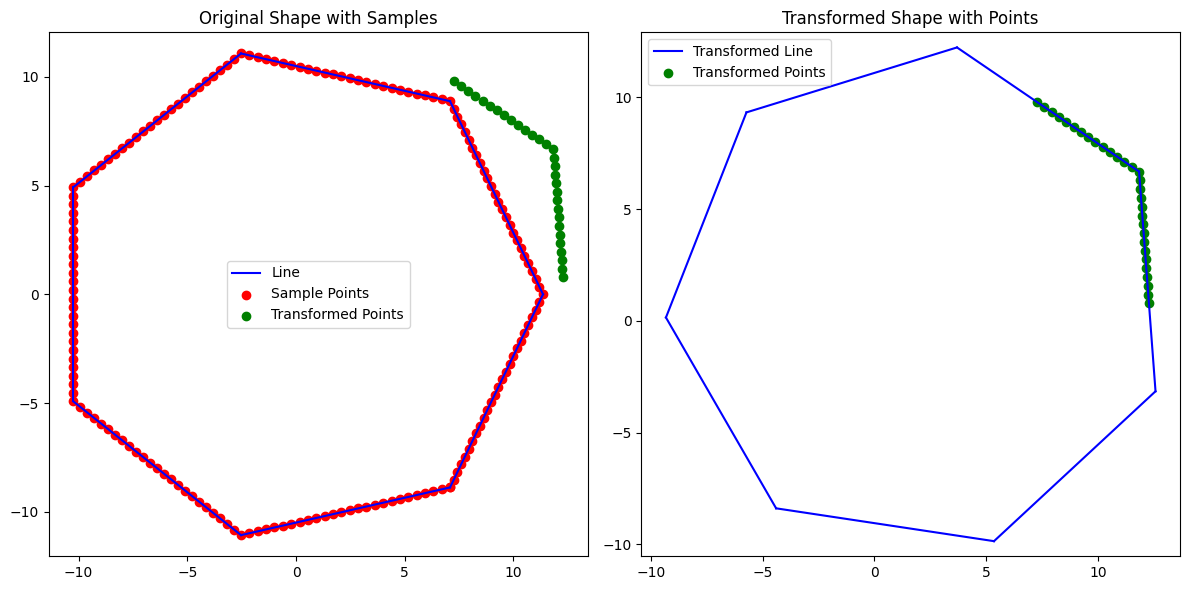

In [4]:
import ezdxf
import numpy as np
import matplotlib.pyplot as plt
import math
def collect_edges(dxf_file):
    doc = ezdxf.readfile(dxf_file)
    edges = []
    for entity in doc.modelspace():
        if entity.dxftype() == 'LINE':
            start = entity.dxf.start
            end = entity.dxf.end
            length = np.linalg.norm([end.x - start.x, end.y - start.y])
            edges.append(('line', (start, end), length))
        elif entity.dxftype() == 'ARC':
            center = entity.dxf.center
            radius = entity.dxf.radius
            start_angle = np.radians(entity.dxf.start_angle)
            end_angle = np.radians(entity.dxf.end_angle)
            if end_angle < start_angle:
                end_angle += 2 * np.pi
            angle_diff = end_angle - start_angle
            length = radius * angle_diff
            edges.append(('arc', (center, radius, start_angle, end_angle), length))
    return edges


def sample_points(edges, n):
    total_length = sum(edge[2] for edge in edges)
    samples = []
    for _ in range(n):
        r = np.random.uniform(0, total_length)
        current = 0
        for edge in edges:
            if current + edge[2] >= r:
                if edge[0] == 'line':
                    start, end = edge[1]
                    t = (r - current) / edge[2]
                    x = start.x + t * (end.x - start.x)
                    y = start.y + t * (end.y - start.y)
                else:
                    center, radius, s_angle, e_angle = edge[1]
                    t = (r - current) / edge[2]
                    angle = s_angle + t * (e_angle - s_angle)
                    x = center.x + radius * np.cos(angle)
                    y = center.y + radius * np.sin(angle)
                samples.append([x, y])
                break
            current += edge[2]
    return np.array(samples)

def sample_points_uniform(edges, n):
    total_length = sum(edge[2] for edge in edges)
    if total_length == 0 or n == 0:
        return np.array([])
    
    # 计算每个边应分配的浮点数量
    float_points = [edge[2] / total_length * n for edge in edges]
    # 初始整数部分和余数
    points_per_edge = [int(fp) for fp in float_points]
    remainders = [fp - ip for fp, ip in zip(float_points, points_per_edge)]
    
    current_total = sum(points_per_edge)
    delta = n - current_total
    
    # 调整余数分配
    if delta != 0:
        sorted_indices = sorted(range(len(remainders)), key=lambda i: -remainders[i])
        for i in range(abs(delta)):
            idx = sorted_indices[i]
            if delta > 0:
                points_per_edge[idx] += 1
            else:
                points_per_edge[idx] -= 1
    
    samples = []
    for edge, k in zip(edges, points_per_edge):
        if k <= 0:
            continue
        if edge[0] == 'line':
            start, end = edge[1]
            t_values = np.linspace(0, 1, k)
            for t in t_values:
                x = start.x + t * (end.x - start.x)
                y = start.y + t * (end.y - start.y)
                samples.append([x, y])
        else:
            center, radius, s_angle, e_angle = edge[1]
            angle_values = np.linspace(s_angle, e_angle, k)
            for angle in angle_values:
                x = center.x + radius * np.cos(angle)
                y = center.y + radius * np.sin(angle)
                samples.append([x, y])
    
    return np.array(samples)

def remove_adjacent_duplicates(points, tolerance=1e-9):
    """
    移除相邻重复的点
    :param points: 输入点集，形状为 (N,2) 的numpy数组
    :param tolerance: 坐标差异容差（默认1e-9）
    :return: 去重后的点集
    """
    if len(points) == 0:
        return points
    
    cleaned = [points[0]]  # 保留第一个点
    for p in points[1:]:
        # 计算与上一个点的欧氏距离
        prev_p = cleaned[-1]
        distance = np.linalg.norm(p - prev_p)
        if distance > tolerance:
            cleaned.append(p)
    return np.array(cleaned)

def create_transform_matrix(scale=1, theta=0, tx=0, ty=0):
    ct = np.cos(theta)
    st = np.sin(theta)
    return np.array([
        [scale*ct, -scale*st, tx],
        [scale*st, scale*ct, ty],
        [0,        0,        1]
    ])
    
def print_all_elements(array):
    for element in array:
        if isinstance(element, (list, tuple)):
            print_all_elements(element)
        elif isinstance(element, dict):
            # 打印字典内容，转换为列表形式以避免只打印键
            print_all_elements(list(element.items()))
        else:
            print(element)
            


def process_points(points):
    results = []
    for i in range(len(points) - 2):
        p1 = points[i]
        p2 = points[i+1]
        p3 = points[i+2]
        x1, y1 = p1
        x2, y2 = p2
        x3, y3 = p3
        
        # 计算叉积判断是否共线
        area = (x2 - x1) * (y3 - y1) - (y2 - y1) * (x3 - x1)
        if abs(area) < 1e-11:
            # 处理直线
            start = (x1, y1)
            end = (x3, y3)
            A = y3 - y1
            B = x1 - x3
            C = (x3 - x1)*y1 - (y3 - y1)*x1
            
            # 计算直线长度
            length = np.sqrt((x3 - x1)**2 + (y3 - y1)**2)
            
            results.append({
                "type": "line",
                "start": start,
                "end": end,
                "equation": (A, B, C),
                "length": length
            })
        else:
            # 处理圆弧
            a1 = x2 - x1
            b1 = y2 - y1
            c1 = (x2**2 - x1**2 + y2**2 - y1**2) / 2
            a2 = x3 - x2
            b2 = y3 - y2
            c2 = (x3**2 - x2**2 + y3**2 - y2**2) / 2
            
            D = a1 * b2 - a2 * b1
            h = (b2 * c1 - b1 * c2) / D
            k = (a1 * c2 - a2 * c1) / D
            r = np.sqrt((h - x1)**2 + (k - y1)**2)
            
            # 计算起始角和终止角
            dx1 = x1 - h
            dy1 = y1 - k
            theta1 = math.atan2(dy1, dx1)
            
            dx3 = x3 - h
            dy3 = y3 - k
            theta3 = math.atan2(dy3, dx3)
            
            # 计算劣弧长度（取最小弧度差）
            delta_theta = abs(theta3 - theta1)
            if delta_theta > math.pi:
                delta_theta = 2 * math.pi - delta_theta
            arc_length = r * delta_theta
            
            results.append({
                "type": "arc",
                "center": (h, k),
                "r": r,
                "start": (x1, y1),
                "end": (x3, y3),
                "arc_length": arc_length
            })
    return results


def get_feature(features):
    """
    改进后的特征合并函数
    修改重点：统一键名、添加容差控制、优化合并逻辑
    """
    merged = []
    for feat in features:
        if not merged:
            merged.append(feat)
            continue
            
        last = merged[-1]
        
        # 圆弧合并逻辑 -----------------------------------------------------
        if last["type"] == "arc" and feat["type"] == "arc":
            # 检查三个合并条件（添加容差控制）
            same_center = np.allclose(last["center"], feat["center"], atol=1e-9)
            same_radius = np.isclose(last["r"], feat["r"], atol=1e-9)
            
            
            
            if same_center and same_radius:
                # 更新终点坐标，保持其他属性不变
                merged[-1] = {
                    "type": "arc",
                    "center": last["center"],
                    "r": last["r"],
                    "start": last["start"],  # 保持最初起点
                    "end": feat["end"]       # 更新终点
                }
                continue
        
        # 直线合并逻辑 -----------------------------------------------------
        elif last["type"] == "line" and feat["type"] == "line":
            # 提取两条直线的方程系数
            A1, B1, C1 = last["equation"]
            A2, B2, C2 = feat["equation"]
            
            # 核心逻辑：判断两直线是否重合（允许比例系数）
            # 条件：A1*B2 = A2*B1 且 B1*C2 = B2*C1 且 A1*C2 = A2*C1
            # 使用交叉相乘避免除零，并添加容差控制
            is_same_line = (
                np.isclose(A1*B2, A2*B1, atol=1e-9) and 
                np.isclose(B1*C2, B2*C1, atol=1e-9) and 
                np.isclose(A1*C2, A2*C1, atol=1e-9)
            )
            
            if is_same_line:
                # 合并为从原起点到新终点的直线，保留第一条直线的方程
                merged[-1] = {
                    "type": "line",
                    "start": last["start"],  # 保持最初起点
                    "end": feat["end"],      # 更新为当前终点
                    "equation": last["equation"]  # 保持原方程
                }
                continue        

        # 不满足合并条件时直接添加 ------------------------------------------
        merged.append(feat)
    
    return merged

def length_examine(merged_features, length_threshold=1e-6):
    """
    综合功能：计算特征长度并过滤
    参数：
        merged_features - 合并后的特征列表
        length_threshold - 长度阈值（默认1e-6）
    返回：
        包含长度属性且满足阈值要求的特征列表
    """
    # 步骤1：计算长度属性
    for feature in merged_features:
        if feature["type"] == "line":
            start = np.array(feature["start"])
            end = np.array(feature["end"])
            feature["length"] = np.linalg.norm(end - start)
            
        elif feature["type"] == "arc":
            center = np.array(feature["center"])
            radius = feature["r"]
            start = np.array(feature["start"])
            end = np.array(feature["end"])
            
            vec_start = start - center
            vec_end = end - center
            theta1 = math.atan2(vec_start[1], vec_start[0])
            theta2 = math.atan2(vec_end[1], vec_end[0])
            
            delta_theta = abs(theta2 - theta1)
            if delta_theta > math.pi:
                delta_theta = 2 * math.pi - delta_theta
            feature["arc_length"] = abs(radius * delta_theta)

    # 步骤2：过滤特征
    real_features = []
    for feat in merged_features:
        if feat["type"] == "line" and feat.get("length", 0) >= length_threshold:
            real_features.append(feat)
        elif feat["type"] == "arc" and feat.get("arc_length", 0) >= length_threshold:
            real_features.append(feat)
    
    return real_features

def find_intersections(real_features):
    """
    改进后的交点计算函数（允许交点在线段/圆弧之外）
    返回格式：[{ "point": (x,y), "features": [feat1, feat2] }, ...]
    """
    def line_line_intersection(line1, line2):
        """ 计算两条无限直线的交点 """
        A1, B1, C1 = line1["equation"]
        A2, B2, C2 = line2["equation"]
        
        det = A1 * B2 - A2 * B1
        if np.isclose(det, 0, atol=1e-12):
            return []  # 平行或重合
        
        x = (B1 * C2 - B2 * C1) / det
        y = (A2 * C1 - A1 * C2) / det
        return [(x, y)]

        
    def line_arc_intersection(line, arc):
        """ 直接使用直线一般式与圆方程联立求解 """
        A, B, C = line["equation"]
        h, k = arc["center"]
        r = arc["r"]
        
        # 联立方程：
        # 1) A*x + B*y + C = 0
        # 2) (x-h)^2 + (y-k)^2 = r^2
        
        # 消元法解方程
        if abs(B) > 1e-9:  # 非垂直线
            # 用直线方程表达y：y = (-A/B)x - C/B
            # 代入圆方程
            m = -A / B
            c = -C / B
            a = 1 + m**2
            b = -2*h + 2*m*(c - k)
            c_ = h**2 + (c - k)**2 - r**2
            
        else:  # 垂直线 (B=0)
            x_val = -C / A
            term = r**2 - (x_val - h)**2
            if term < 0:
                return []
            y1 = k + math.sqrt(term)
            y2 = k - math.sqrt(term)
            return [(x_val, y1), (x_val, y2)]
        
        discriminant = b**2 - 4*a*c_
        
        # 使用更稳定的根计算公式
        sqrt_discriminant = math.sqrt(max(discriminant, 0))
        
        # 避免减法抵消
        if b > 0:
            x1 = (-b - sqrt_discriminant) / (2*a)
        else:
            x1 = (-b + sqrt_discriminant) / (2*a)
        x2 = c_ / (a*x1) if x1 != 0 else 0
        
        y1 = m*x1 + c
        y2 = m*x2 + c
        
        return [(x1, y1), (x2, y2)]

    def arc_arc_intersection(arc1, arc2):
        """ 计算两个圆的所有交点（不限制在圆弧范围内） """
        h1, k1 = arc1["center"]
        r1 = arc1["r"]
        h2, k2 = arc2["center"]
        r2 = arc2["r"]
        
        d = math.sqrt((h2 - h1)**2 + (k2 - k1)**2)
        if d > r1 + r2 + 1e-9 or d < abs(r1 - r2) - 1e-9:
            return []
        
        a = (r1**2 - r2**2 + d**2) / (2*d)
        h = h1 + a*(h2 - h1)/d
        k = k1 + a*(k2 - k1)/d
        m = math.sqrt(r1**2 - a**2)
        
        dx = -m*(k2 - k1)/d
        dy = m*(h2 - h1)/d
        return [(h + dx, k + dy), (h - dx, k - dy)]

    intersections = []
    for i in range(len(real_features) - 1):
        feat1 = real_features[i]
        feat2 = real_features[i+1]
        
        # 直线与直线
        if feat1["type"] == "line" and feat2["type"] == "line":
            points = line_line_intersection(feat1, feat2)
        
        # 直线与圆弧
        elif (feat1["type"], feat2["type"]) in [("line", "arc"), ("arc", "line")]:
            line = feat1 if feat1["type"] == "line" else feat2
            arc = feat2 if feat2["type"] == "arc" else feat1
            points = line_arc_intersection(line, arc)
        
        # 圆弧与圆弧
        elif feat1["type"] == "arc" and feat2["type"] == "arc":
            points = arc_arc_intersection(feat1, feat2)
        
        else:
            continue
        
        # 选择距离前一特征终点最近的点
        if points:
            ref_point = np.array(feat1["end"])
            nearest = min(points, key=lambda p: np.linalg.norm(np.array(p) - ref_point))
            intersections.append({
                "point": (nearest[0], nearest[1]),
                "features": [feat1, feat2]
            })
    
    return intersections

# 读取DXF文件并获取变换参数
dxf_file = 'seven.DXF'
edges = collect_edges(dxf_file)
print_all_elements(edges)
doc = ezdxf.readfile(dxf_file)  # 重新读取用于绘图
transform_matrix = create_transform_matrix(scale=1, theta=np.radians(30), tx=2, ty=1)

# 采样和应用变换
original_points = sample_points_uniform(edges, 180)
original_points = remove_adjacent_duplicates(original_points)
#print("\noriginal_points")
#print(f"\n{original_points[0][0]}, {original_points[0][1]}")
#print(f"\nPoint (2): ({original_points[1][0]}, {original_points[1][1]})")
#print_all_elements(original_points)

test_points = original_points[10:40]  # 包含a和b索引的行


homogeneous = np.column_stack([test_points, np.ones(len(test_points))])
#print("\nhomogeneous")
#print_all_elements(homogeneous)
transformed_points = (homogeneous @ transform_matrix.T)[:, :2]
print("\ntransformed_points")
print_all_elements(transformed_points)

result = process_points(transformed_points)
print("\nresult")
print_all_elements(result)

merged_features = get_feature(result)
real_features = length_examine(merged_features,0.9)
intersections = find_intersections(real_features)



print("\nreal_features:")
print_all_elements(real_features)
print("\nIntersections:")
print_all_elements(intersections)


# 或直接一步到位
x = intersections[0]["point"][0]
y = intersections[0]["point"][1]

print("\nIntersections:")
print(f"交点: ({x}, {y})")



###
# 这边会发现Intersections第一个特征的终点坐标与第二个特征的起点坐标相同，是因为我用的点有端点，但是后续不要以这个为默认的来写。只能用这个点坐标为共有点的信息。

#
# ================== 新增代码：特征转换和匹配 ==================

def calculate_angle(feat1, feat2, intersection_point):
    """
    计算两个特征在交点处的夹角（考虑圆弧切线方向）
    """
    # 获取交点坐标
    x, y = intersection_point
    
    # 计算两个特征在交点处的方向向量
    def get_direction(feature):
        if feature["type"] == "line":
            # 直线方向向量为终点-起点
            dx = feature["end"][0] - feature["start"][0]
            dy = feature["end"][1] - feature["start"][1]
            return (dx, dy)
        else:
            # 圆弧方向为切线方向（垂直于半径方向）
            center = np.array(feature["center"])
            point = np.array([x, y])
            radius_vec = point - center  # 半径向量
            tangent = np.array([-radius_vec[1], radius_vec[0]])  # 逆时针切线
            return tangent
    
    vec1 = get_direction(feat1)
    vec2 = get_direction(feat2)
    
    # 计算向量夹角（弧度）
    dot_product = vec1[0]*vec2[0] + vec1[1]*vec2[1]
    norm1 = np.linalg.norm(vec1)
    norm2 = np.linalg.norm(vec2)
    
    if norm1 == 0 or norm2 == 0:
        return 0.0
    
    cos_theta = dot_product / (norm1 * norm2)
    angle = np.arccos(np.clip(cos_theta, -1.0, 1.0))
    
    # 转换为角度制（0~180）
    return np.degrees(angle) % 180

def convert_edges_to_processed(edges):
    """将原始edges元组转换为processed格式的字典"""
    processed = []
    for edge in edges:
        if edge[0] == 'line':
            start = (edge[1][0].x, edge[1][0].y)
            end = (edge[1][1].x, edge[1][1].y)
            processed.append({
                "type": "line",
                "start": start,
                "end": end
            })
        else:
            center = (edge[1][0].x, edge[1][0].y)
            radius = edge[1][1]
            start_angle = edge[1][2]
            end_angle = edge[1][3]
            # 计算圆弧起点和终点坐标
            start = (
                center[0] + radius * np.cos(start_angle),
                center[1] + radius * np.sin(start_angle)
            )
            end = (
                center[0] + radius * np.cos(end_angle),
                center[1] + radius * np.sin(end_angle)
            )
            processed.append({
                "type": "arc",
                "center": center,
                "radius": radius,
                "start_angle": start_angle,
                "end_angle": end_angle,
                "start": start,
                "end": end
            })
    return processed

def match_intersections(edges, intersections, angle_tolerance=5):
    """
    修改后的匹配函数（使用转换后的edges）
    返回格式: [{"original_point": (x,y), "edge_point": (x,y), "features": [feat1,feat2], "angle": angle}, ...]
    """
    # 生成所有相邻特征对
    edge_pairs = [(edges[i], edges[(i+1)%len(edges)]) for i in range(len(edges))]
    
    # 计算每个特征对的类型组合和夹角
    edge_data = []
    for feat1, feat2 in edge_pairs:
        # 获取共同端点（使用转换后的坐标）
        common_point = feat1["end"]
        
        # 计算夹角
        angle = calculate_angle(feat1, feat2, common_point)
        
        edge_data.append({
            "type_pair": (feat1["type"], feat2["type"]),
            "angle": angle,
            "point": common_point,
            "features": [feat1, feat2]
        })

    # 匹配intersections中的交点
    matched_points = []
    for inter in intersections:
        inter_type = tuple(sorted([inter["features"][0]["type"], inter["features"][1]["type"]]))
        inter_angle = calculate_angle(inter["features"][0], inter["features"][1], inter["point"])
        
        # 在edge_data中查找匹配项
        for ed in edge_data:
            ed_type = tuple(sorted([ed["features"][0]["type"], ed["features"][1]["type"]]))
            if ed_type == inter_type and abs(ed["angle"] - inter_angle) < angle_tolerance:
                matched_points.append({
                    "original_point": inter["point"],
                    "edge_point": ed["point"],
                    "angle": ed["angle"],
                    "features": ed["features"]
                })
    
    return matched_points

# 执行转换和匹配
processed_edges = convert_edges_to_processed(edges)  # 转换数据结构
matched = match_intersections(processed_edges, intersections)

# ================== 输出最终结果 ==================
print("\n=== 最终匹配结果 ===")
for item in matched:
    print(f"原始交点: ({item['original_point'][0]:.6f}, {item['original_point'][1]:.6f})")
    print(f"映射到edges的点: ({item['edge_point'][0]:.6f}, {item['edge_point'][1]:.6f})")
    print(f"特征组合: {item['features'][0]['type']} → {item['features'][1]['type']}")
    print(f"计算角度: {item['angle']:.2f}°\n")

# 可视化设置（原有代码保持不变）
plt.figure(figsize=(12, 6))


# 可视化设置
plt.figure(figsize=(12, 6))


# 左侧子图：原始图形和点
plt.subplot(121)
# 绘制原始图形
plotted_line, plotted_arc = False, False
for entity in doc.modelspace():
    if entity.dxftype() == 'LINE':
        start = entity.dxf.start
        end = entity.dxf.end
        plt.plot([start.x, end.x], [start.y, end.y], 
                'b-', label='Line' if not plotted_line else "")
        plotted_line = True
    elif entity.dxftype() == 'ARC':
        center = entity.dxf.center
        radius = entity.dxf.radius
        start_angle = entity.dxf.start_angle
        end_angle = entity.dxf.end_angle
        if end_angle < start_angle:
            end_angle += 360
        theta = np.linspace(start_angle, end_angle, 100)
        theta_rad = np.radians(theta)
        x = center.x + radius * np.cos(theta_rad)
        y = center.y + radius * np.sin(theta_rad)
        plt.plot(x, y, 'b-', label='Arc' if not plotted_arc else "")
        plotted_arc = True
plt.scatter(original_points[:, 0], original_points[:, 1], c='r', label='Sample Points')
plt.scatter(transformed_points[:, 0], transformed_points[:, 1], c='g', label='Transformed Points')
plt.title("Original Shape with Samples")
plt.axis('equal')
plt.legend()

# 右侧子图：变换后的图形和点
plt.subplot(122)
# 绘制变换后的图形
plotted_tline, plotted_tarc = False, False
for entity in doc.modelspace():
    if entity.dxftype() == 'LINE':
        start = entity.dxf.start
        end = entity.dxf.end
        # 变换线段的端点
        start_t = transform_matrix @ np.array([start.x, start.y, 1])
        end_t = transform_matrix @ np.array([end.x, end.y, 1])
        plt.plot([start_t[0], end_t[0]], [start_t[1], end_t[1]], 
                'b-', label='Transformed Line' if not plotted_tline else "")
        plotted_tline = True
        
    elif entity.dxftype() == 'ARC':
        center = entity.dxf.center
        radius = entity.dxf.radius
        start_angle = entity.dxf.start_angle
        end_angle = entity.dxf.end_angle
        # 生成原始弧线点并变换
        if end_angle < start_angle:
            end_angle += 360
        theta = np.linspace(start_angle, end_angle, 100)
        theta_rad = np.radians(theta)
        x = center.x + radius * np.cos(theta_rad)
        y = center.y + radius * np.sin(theta_rad)
        # 应用变换到每个点
        points = np.column_stack([x, y, np.ones(len(x))])
        transformed = (points @ transform_matrix.T)[:, :2]
        plt.plot(transformed[:, 0], transformed[:, 1], 
                'r-', label='Transformed Arc' if not plotted_tarc else "")
        plotted_tarc = True

plt.scatter(transformed_points[:, 0], transformed_points[:, 1], c='g', label='Transformed Points')
plt.title("Transformed Shape with Points")
plt.axis('equal')
plt.legend()

plt.tight_layout()
plt.show()